**Name :** Kai Chuen Tan<br>
**Professor :** Dr. Henrik Christensen<br>
**Date :** 23rd November 2021<br>

## Homework 5 (Final) - CSE 276C - Math for Robotics

The world model is shown in figure 1. The robot is a differential drive system with a square geometry of size 50 $\times$ 50.

![title](Configuration_Space.png)

### Problem 1
Generate the configuration space for the robot with a grid size of 2 $\times$ 2 and 5 deg in angular resolution. Generate an illustration of what the configuration space looks like with the robot at orientations 0, 45 and 90 deg.

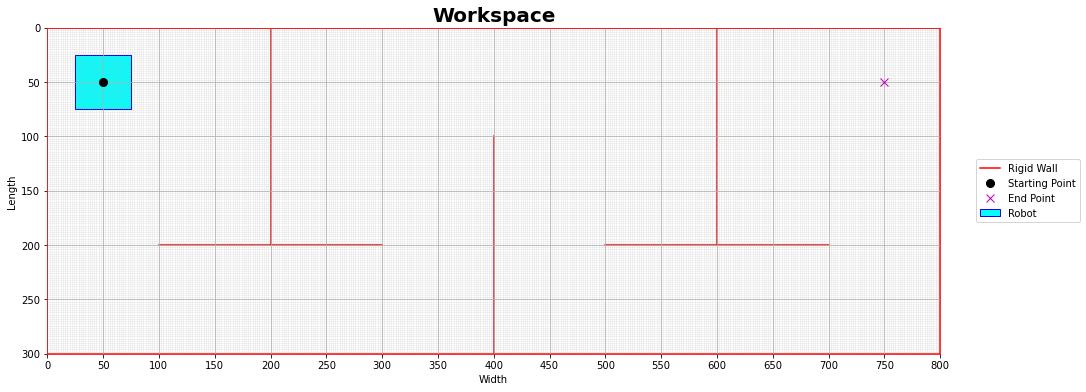

In [1]:
# Import necessary libraries
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.cm as cm
%matplotlib inline
import numpy as np
import random
import skgeom as sg
from skgeom.draw import draw
from skgeom import minkowski
from skimage.draw import line_nd
from scipy.spatial import cKDTree

## Configuration
# Grid Resolution
grid_res = 2
angle_res = 5

# R2-D2 Robot Size
R2_D2_Robot_Size = np.array([50, 50])

# Starting point and end point from second part of the problem
strt_pt = np.array([50, 50])
end_pt = np.array([750, 50])

# Map Size
map_size_Width = (0, 800) # Width
map_size_Length = (0, 300) # Length

# Major Grid Size
major_grid_Width = np.arange(0, 801, 50)
major_grid_Length = np.arange(0, 301, 50)

# Minor Grid Size
minor_grid_Width = np.arange(0, 801, grid_res)
minor_grid_Length = np.arange(0, 301, grid_res)

# Thin and rigid walls (Robot Shall Not Pass! DANGER!)
# [[[x-coords_line_1],[y-coords_line_1]],
#  [[x-coords_line_2],[y-coords2_line_2]]]
thin_walls = np.array([
    [[0, 0], [0, 300]],     # Outer left wall
    [[0, 800], [300, 300]],   # Outer bottom wall
    [[800, 800], [0, 300]], # Outer right wall
    [[0, 800], [0, 0]],      # Outer top wall
    # Inner walls
    [[200, 200],[0, 200]],
    [[100, 300],[200, 200]],
    [[400, 400],[100, 300]],
    [[600, 600],[0, 200]],
    [[500, 700],[200, 200]],
])

### A.) Plot the Configuration Space
## 1.) Try plotting workspace first
# a.) Define figure and axis, and set figure size
fig, ax = plt.subplots(figsize = (16, 6))

# b.) Label axis
plt.xlabel('Width')
plt.ylabel('Length')

# c.) Set axis limit
plt.xlim(map_size_Width)
plt.ylim(map_size_Length)
plt.gca().invert_yaxis()

# d.) Plot major grid
ax.set_xticks(major_grid_Width)
ax.set_yticks(major_grid_Length)
plt.grid(visible = True, which = 'major', linestyle='-') # Major grid parameters

# e.) Plot minor grid
ax.set_xticks(minor_grid_Width, minor = True)  # Set the grid resolution to 2 x 2
ax.set_yticks(minor_grid_Length, minor = True) # Set the grid resolution to 2 x 2
plt.grid(visible = True, which = 'minor', linestyle='-', alpha=0.2) # Minor grid parameters
ax.tick_params(which='minor', bottom=False, left=False) # Hide grid

# f.) Plot walls in red
# Outer walls
for spine in ax.spines.values():
    
    spine.set_edgecolor('red')
    
# Inner walls
for idx in range(0, thin_walls.shape[0]):
    
    if idx == 1:
        
        plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', label = "Rigid Wall", zorder = 1)
        continue
        
    plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', zorder = 1)
    
# g.) Plot the initial location of the robot
ax.add_patch(Rectangle((strt_pt[0]-R2_D2_Robot_Size[0]/2, strt_pt[1]-R2_D2_Robot_Size[0]/2), 
                        R2_D2_Robot_Size[0], R2_D2_Robot_Size[1],
                        edgecolor = 'blue',
                        facecolor = 'cyan',
                        fill = True,
                        lw = 1,
                        angle = 0,
                        label = "Robot"))

# h.) Plot the starting location and the ending location
plt.plot(strt_pt[0], strt_pt[1], 'ko', label ="Starting Point", markersize = 8)
plt.plot(end_pt[0], end_pt[1], 'mx', label ="End Point", markersize = 8)

# f.) Plot title
plt.title("Workspace", fontsize = 20, fontweight = "bold")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show()


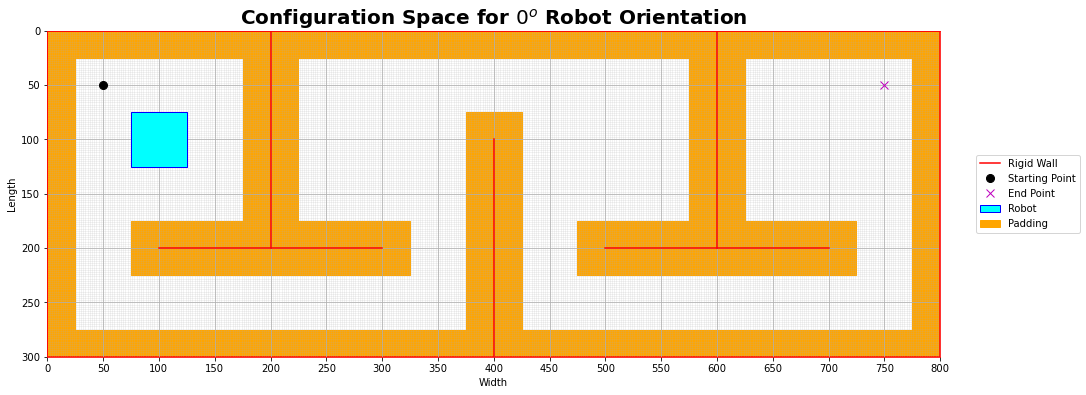

In [2]:
# Plot the configuration space with different orientation of the robots
robot_orientation = angle_res * round(0 / angle_res) # Degree

## 1.) Plot configuration space with the robot orientation at 0 degree
# a.) Define figure and axis, and set figure size
fig, ax = plt.subplots(figsize = (16, 6))

# b.) Label axis
plt.xlabel('Width')
plt.ylabel('Length')

# c.) Set axis limit
plt.xlim(map_size_Width)
plt.ylim(map_size_Length)
plt.gca().invert_yaxis()

# d.) Plot major grid
ax.set_xticks(major_grid_Width)
ax.set_yticks(major_grid_Length)
plt.grid(visible = True, which='major', linestyle='-') # Major grid parameters

# e.) Plot minor grid
ax.set_xticks(minor_grid_Width, minor = True)  # Set the grid resolution to 2 x 2
ax.set_yticks(minor_grid_Length, minor = True) # Set the grid resolution to 2 x 2
plt.grid(visible = True, which='minor', linestyle='-', alpha=0.2) # Minor grid parameters
ax.tick_params(which='minor', bottom=False, left=False) # Hide grid

# f.) Plot walls in red
# Outer walls
for spine in ax.spines.values():
    
    spine.set_edgecolor('red')
    
# Inner walls
for idx in range(0, thin_walls.shape[0]):
    
    if idx == 1:
        
        plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', label = "Rigid Wall", zorder = 1)
        continue
        
    plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', zorder = 2)
    
# g.) Plot the initial location of the robot
ax.add_patch(Rectangle((100 - R2_D2_Robot_Size[0]/2, 100 - R2_D2_Robot_Size[0]/2), 
                        R2_D2_Robot_Size[0], R2_D2_Robot_Size[1],
                        edgecolor = 'blue',
                        facecolor = 'cyan',
                        fill = True,
                        lw = 1,
                        angle = robot_orientation,
                        zorder = 2,
                        label = "Robot"))

# h.) Plot the configuration space
for idx in range(0, thin_walls.shape[0]):
    
    # If the wall is a horizontal line
    if abs(thin_walls[idx][0][1] - thin_walls[idx][0][0]) > 0:
        
        # Label only once
        if idx == thin_walls.shape[0] - 1:
            
            ax.add_patch(Rectangle((thin_walls[idx][0][0]-R2_D2_Robot_Size[0]/2, thin_walls[idx][1][0]-R2_D2_Robot_Size[1]/2), 
                                    abs(thin_walls[idx][0][1] - thin_walls[idx][0][0]) + R2_D2_Robot_Size[0], R2_D2_Robot_Size[1],
                                    edgecolor = 'orange',
                                    facecolor = 'orange',
                                    fill = True,
                                    lw = 1,
                                    angle = robot_orientation,
                                    label = "Padding"))
        # Padding without labels
        else:
            
            ax.add_patch(Rectangle((thin_walls[idx][0][0]-R2_D2_Robot_Size[0]/2, thin_walls[idx][1][0]-R2_D2_Robot_Size[1]/2), 
                                    abs(thin_walls[idx][0][1] - thin_walls[idx][0][0]) + R2_D2_Robot_Size[0], R2_D2_Robot_Size[1],
                                    edgecolor = 'orange',
                                    facecolor = 'orange',
                                    fill = True,
                                    lw = 1,
                                    angle = robot_orientation))
    # Vertical Wall
    else:
        
        # Label only once
        if idx == thin_walls.shape[0] - 1:
            
            ax.add_patch(Rectangle((thin_walls[idx][0][0]-R2_D2_Robot_Size[0]/2, thin_walls[idx][1][0]-R2_D2_Robot_Size[1]/2), 
                                    R2_D2_Robot_Size[0], abs(thin_walls[idx][1][1] - thin_walls[idx][1][0]) + R2_D2_Robot_Size[1],
                                    edgecolor = 'orange',
                                    facecolor = 'orange',
                                    fill = True,
                                    lw = 1,
                                    angle = robot_orientation,
                                    label = "Padding"))
        # Padding without label
        else:
            
            ax.add_patch(Rectangle((thin_walls[idx][0][0]-R2_D2_Robot_Size[0]/2, thin_walls[idx][1][0]-R2_D2_Robot_Size[1]/2), 
                                    R2_D2_Robot_Size[0], abs(thin_walls[idx][1][1] - thin_walls[idx][1][0]) + R2_D2_Robot_Size[1],
                                    edgecolor = 'orange',
                                    facecolor = 'orange',
                                    fill = True,
                                    lw = 1,
                                    angle = robot_orientation))
            
# i.) Plot the starting location and the ending location
plt.plot(strt_pt[0], strt_pt[1], 'ko', label ="Starting Point", markersize = 8)
plt.plot(end_pt[0], end_pt[1], 'mx', label ="End Point", markersize = 8)

# j.) Plot title
plt.title("Configuration Space for $0^o$ Robot Orientation", fontsize = 20, fontweight = "bold")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show()


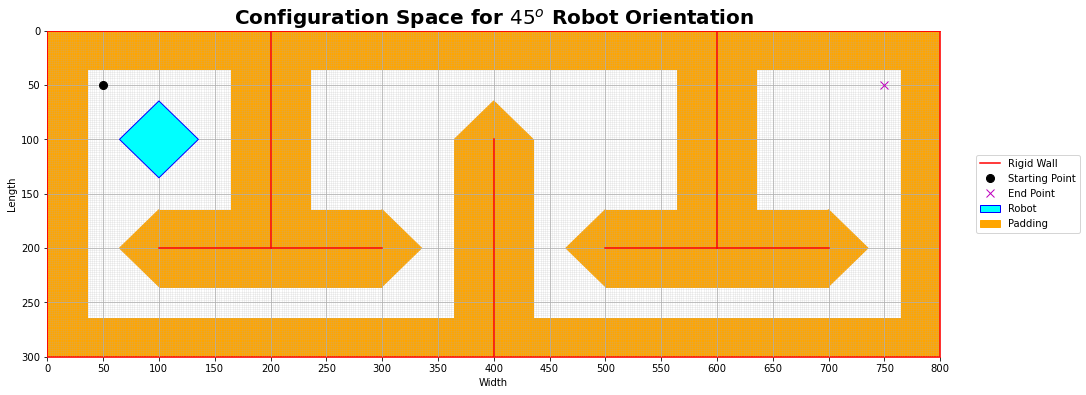

In [3]:
# Plot the configuration space with different orientation of the robots
robot_orientation = angle_res * round(45 / angle_res) # 45 Degrees

## 1.) Plot configuration space with the robot orientation at 0 degree
# a.) Define figure and axis, and set figure size
fig, ax = plt.subplots(figsize = (16, 6))

# b.) Label axis
plt.xlabel('Width')
plt.ylabel('Length')

# c.) Set axis limit
plt.xlim(map_size_Width)
plt.ylim(map_size_Length)
plt.gca().invert_yaxis()

# d.) Plot major grid
ax.set_xticks(major_grid_Width)
ax.set_yticks(major_grid_Length)
plt.grid(visible = True, which='major', linestyle='-') # Major grid parameters

# e.) Plot minor grid
ax.set_xticks(minor_grid_Width, minor = True)  # Set the grid resolution to 2 x 2
ax.set_yticks(minor_grid_Length, minor = True) # Set the grid resolution to 2 x 2
plt.grid(visible = True, which='minor', linestyle='-', alpha=0.2) # Minor grid parameters
ax.tick_params(which='minor', bottom=False, left=False) # Hide grid

# f.) Plot walls in red
# Outer walls
for spine in ax.spines.values():
    
    spine.set_edgecolor('red')
    
# Inner walls
for idx in range(0, thin_walls.shape[0]):
    
    if idx == 1:
        
        plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', label = "Rigid Wall", zorder = 1)
        continue
        
    plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', zorder = 2)
    
# g.) Plot the initial location of the robot
ax.add_patch(Rectangle((100, 100 - np.sqrt(R2_D2_Robot_Size[0]**2 + R2_D2_Robot_Size[1]**2)/2), 
                        R2_D2_Robot_Size[0], R2_D2_Robot_Size[1],
                        edgecolor = 'blue',
                        facecolor = 'cyan',
                        fill = True,
                        lw = 1,
                        angle = robot_orientation,
                        zorder = 2,
                        label = "Robot"))

# h.) Plot the configuration space
for idx in range(0, thin_walls.shape[0]):
    
    # If the wall is a horizontal line
    if abs(thin_walls[idx][0][1] - thin_walls[idx][0][0]) > 0:
        
        # Label only once
        if idx == thin_walls.shape[0] - 1:
            
            ax.add_patch(Rectangle((thin_walls[idx][0][0], thin_walls[idx][1][0] - np.sqrt(R2_D2_Robot_Size[0]**2 + R2_D2_Robot_Size[1]**2)/2), 
                                    R2_D2_Robot_Size[0], R2_D2_Robot_Size[1],
                                    edgecolor = 'orange',
                                    facecolor = 'orange',
                                    angle = robot_orientation,
                                    fill = True,
                                    lw = 1))
            
            ax.add_patch(Rectangle((thin_walls[idx][0][1], thin_walls[idx][1][1] - np.sqrt(R2_D2_Robot_Size[0]**2 + R2_D2_Robot_Size[1]**2)/2), 
                                    R2_D2_Robot_Size[0], R2_D2_Robot_Size[1],
                                    edgecolor = 'orange',
                                    facecolor = 'orange',
                                    angle = robot_orientation,
                                    fill = True,
                                    lw = 1,
                                    label = "Padding"))
            
            ax.add_patch(Rectangle((thin_walls[idx][0][0] , thin_walls[idx][1][0] - np.sqrt(R2_D2_Robot_Size[0]**2 + R2_D2_Robot_Size[1]**2)/2), 
                                    abs(thin_walls[idx][0][1] - thin_walls[idx][0][0]), np.sqrt(R2_D2_Robot_Size[0]**2 + R2_D2_Robot_Size[1]**2),
                                    edgecolor = 'orange',
                                    facecolor = 'orange',
                                    fill = True,
                                    lw = 1))
            
        # Without label
        else:
            
            ax.add_patch(Rectangle((thin_walls[idx][0][0], thin_walls[idx][1][0] - np.sqrt(R2_D2_Robot_Size[0]**2 + R2_D2_Robot_Size[1]**2)/2), 
                                    R2_D2_Robot_Size[0], R2_D2_Robot_Size[1],
                                    edgecolor = 'orange',
                                    facecolor = 'orange',
                                    angle = robot_orientation,
                                    fill = True,
                                    lw = 1))
            
            ax.add_patch(Rectangle((thin_walls[idx][0][1], thin_walls[idx][1][1] - np.sqrt(R2_D2_Robot_Size[0]**2 + R2_D2_Robot_Size[1]**2)/2), 
                                    R2_D2_Robot_Size[0], R2_D2_Robot_Size[1],
                                    edgecolor = 'orange',
                                    facecolor = 'orange',
                                    angle = robot_orientation,
                                    fill = True,
                                    lw = 1))
            
            ax.add_patch(Rectangle((thin_walls[idx][0][0], thin_walls[idx][1][0] - np.sqrt(R2_D2_Robot_Size[0]**2 + R2_D2_Robot_Size[1]**2)/2), 
                                    abs(thin_walls[idx][0][1] - thin_walls[idx][0][0]), np.sqrt(R2_D2_Robot_Size[0]**2 + R2_D2_Robot_Size[1]**2),
                                    edgecolor = 'orange',
                                    facecolor = 'orange',
                                    fill = True,
                                    lw = 1))
            
    # Vertical Walls Padding
    else:
        
            ax.add_patch(Rectangle((thin_walls[idx][0][0], thin_walls[idx][1][0] - np.sqrt(R2_D2_Robot_Size[0]**2 + R2_D2_Robot_Size[1]**2)/2), 
                                    R2_D2_Robot_Size[0], R2_D2_Robot_Size[1],
                                    edgecolor = 'orange',
                                    facecolor = 'orange',
                                    angle = robot_orientation,
                                    fill = True,
                                    lw = 1))
            
            ax.add_patch(Rectangle((thin_walls[idx][0][1], thin_walls[idx][1][1] - np.sqrt(R2_D2_Robot_Size[0]**2 + R2_D2_Robot_Size[1]**2)/2), 
                                    R2_D2_Robot_Size[0], R2_D2_Robot_Size[1],
                                    edgecolor = 'orange',
                                    facecolor = 'orange',
                                    angle = robot_orientation,
                                    fill = True,
                                    lw = 1))
            
            ax.add_patch(Rectangle((thin_walls[idx][0][0] - np.sqrt(R2_D2_Robot_Size[0]**2 + R2_D2_Robot_Size[1]**2)/2, thin_walls[idx][1][0]), 
                                    np.sqrt(R2_D2_Robot_Size[0]**2 + R2_D2_Robot_Size[1]**2), abs(thin_walls[idx][1][1] - thin_walls[idx][1][0]),
                                    edgecolor = 'orange',
                                    facecolor = 'orange',
                                    fill = True,
                                    lw = 1))

# i.) Plot the starting location and the ending location
plt.plot(strt_pt[0], strt_pt[1], 'ko', label ="Starting Point", markersize = 8)
plt.plot(end_pt[0], end_pt[1], 'mx', label ="End Point", markersize = 8)

# j.) Plot title
plt.title("Configuration Space for $45^o$ Robot Orientation", fontsize = 20, fontweight = "bold")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show()

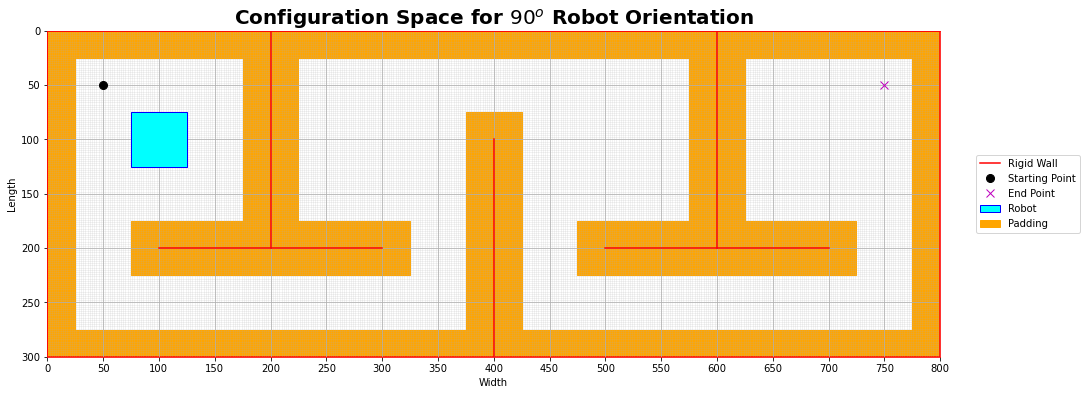

In [4]:
# Plot the configuration space with different orientation of the robots
robot_orientation = angle_res * round(90 / angle_res) # 90 Degrees

## 1.) Plot configuration space with the robot orientation at 0 degree
# a.) Define figure and axis, and set figure size
fig, ax = plt.subplots(figsize = (16, 6))

# b.) Label axis
plt.xlabel('Width')
plt.ylabel('Length')

# c.) Set axis limit
plt.xlim(map_size_Width)
plt.ylim(map_size_Length)
plt.gca().invert_yaxis()

# d.) Plot major grid
ax.set_xticks(major_grid_Width)
ax.set_yticks(major_grid_Length)
plt.grid(visible = True, which='major', linestyle='-') # Major grid parameters

# e.) Plot minor grid
ax.set_xticks(minor_grid_Width, minor = True)  # Set the grid resolution to 2 x 2
ax.set_yticks(minor_grid_Length, minor = True) # Set the grid resolution to 2 x 2
plt.grid(visible = True, which='minor', linestyle='-', alpha=0.2) # Minor grid parameters
ax.tick_params(which='minor', bottom=False, left=False) # Hide grid

# f.) Plot walls in red
# Outer walls
for spine in ax.spines.values():
    
    spine.set_edgecolor('red')
    
# Inner walls
for idx in range(0, thin_walls.shape[0]):
    
    if idx == 1:
        
        plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', label = "Rigid Wall", zorder = 1)
        continue
        
    plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', zorder = 2)
    
# g.) Plot the initial location of the robot
ax.add_patch(Rectangle((100+R2_D2_Robot_Size[0]/2, 100-R2_D2_Robot_Size[0]/2), 
                        R2_D2_Robot_Size[0], R2_D2_Robot_Size[1],
                        edgecolor = 'blue',
                        facecolor = 'cyan',
                        fill = True,
                        lw = 1,
                        angle = robot_orientation,
                        zorder = 2,
                        label = "Robot"))

# h.) Plot the configuration space
for idx in range(0, thin_walls.shape[0]):
    
    # If the wall is a horizontal line
    if abs(thin_walls[idx][0][1] - thin_walls[idx][0][0]) > 0:
        
        # Label only once
        if idx == thin_walls.shape[0] - 1:
            ax.add_patch(Rectangle((thin_walls[idx][0][0]-R2_D2_Robot_Size[0]/2, thin_walls[idx][1][0]-R2_D2_Robot_Size[1]/2), 
                                    abs(thin_walls[idx][0][1] - thin_walls[idx][0][0]) + R2_D2_Robot_Size[0], R2_D2_Robot_Size[1],
                                    edgecolor = 'orange',
                                    facecolor = 'orange',
                                    fill = True,
                                    lw = 1,
                                    label = "Padding"))
            
        # Padding without labels
        else:
            
            ax.add_patch(Rectangle((thin_walls[idx][0][0]-R2_D2_Robot_Size[0]/2, thin_walls[idx][1][0]-R2_D2_Robot_Size[1]/2), 
                                    abs(thin_walls[idx][0][1] - thin_walls[idx][0][0]) + R2_D2_Robot_Size[0], R2_D2_Robot_Size[1],
                                    edgecolor = 'orange',
                                    facecolor = 'orange',
                                    fill = True,
                                    lw = 1))
            
    # Vertical wall padding without labels
    else:
        
        ax.add_patch(Rectangle((thin_walls[idx][0][0]-R2_D2_Robot_Size[0]/2, thin_walls[idx][1][0]-R2_D2_Robot_Size[1]/2), 
                                R2_D2_Robot_Size[0], abs(thin_walls[idx][1][1] - thin_walls[idx][1][0]) + R2_D2_Robot_Size[1],
                                edgecolor = 'orange',
                                facecolor = 'orange',
                                fill = True,
                                lw = 1))
        
# i.) Plot the starting location and the ending location
plt.plot(strt_pt[0], strt_pt[1], 'ko', label ="Starting Point", markersize = 8)
plt.plot(end_pt[0], end_pt[1], 'mx', label ="End Point", markersize = 8)

# j.) Plot title
plt.title("Configuration Space for $90^o$ Robot Orientation", fontsize = 20, fontweight = "bold")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show()

### Problem 2
Use greedy search to find the shortest path between start-point (50,50) and end-point (750,50). Illustrate the path and provide its length.

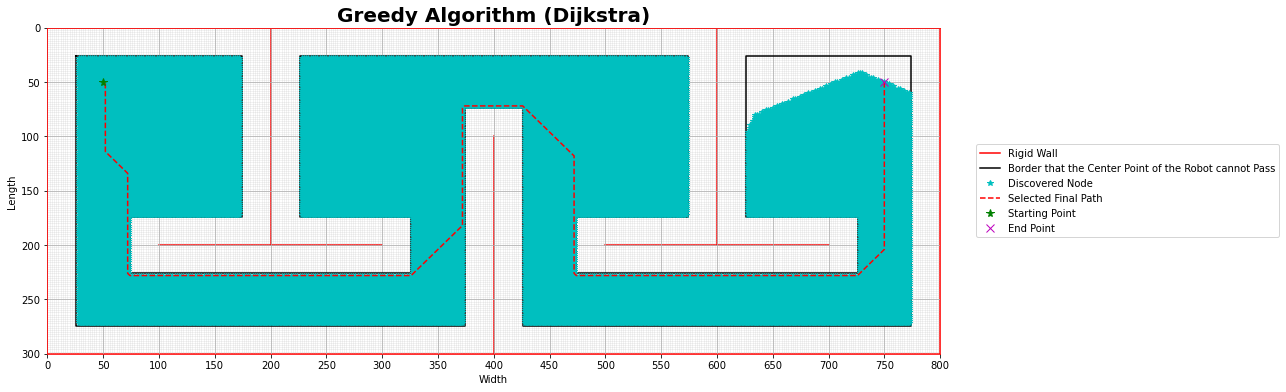

In [5]:
## Given:
# 1.) Grid resolution is 2, and angle resolution is 5
# 2.) Starting point (50, 50) and End-point (750, 50)

## Assumptions:
# 1.) Robot can only move to one of their 8 nearest neighbour nodes from its position.
# 2.) Robot Orientation could move up, down, left, right, and diagonally with orientation 0 degree.
# 3.) The center point of the robot will be starting at the starting point.
# 4.) The edge of the robot will not intersect or overlap wall edges.
# 5.) Robot can move diagonally.

## Define the greedy algorithm, which is also known as Dijkstra Algorithm user-defined function
class Dijkstra_Algorithm:
    
    def __init__(self, obstacles, grid_res, angle_res, robot_Size = 1.0):
        
        # obstacles       : An array of obstacle nodes [[ox_1, oy_1], [ox_2, oy_2], [ox_3, oy_3], ...]
        # robot_Size      : Maximum radius of the robot
        # grid_resolution : resolution of the grid in unit
        # angle_resolution: resolution of the grid in degree
    
        # Step 1: Initialization
        # Obstacles array
        self.obstacles = obstacles
        # Grid resolution
        self.grid_res = grid_res
        # Angle resolution
        self.angle_res = angle_res
        # Robot size
        self.robot_Size = robot_Size
        
        # Step 2: Data Extraction
        # Determine the lower and upper bounds of the configuration space
        self.min_Width = min(self.obstacles[:, 0])
        self.max_Width = max(self.obstacles[:, 0])
        self.min_Length = min(self.obstacles[:, 1])
        self.max_Length = max(self.obstacles[:, 1])
        
    # Create a unique ID for the dictionary
    def node_uniq_ID(self, node):
        
        # x_coord digit 1 , x_coord digit 2, x_coord digit 3, y_coord digit 1 , y_coord digit 2, y_coord digit 3
        uniq_ID = node.x * 1000 + node.y
        
        return uniq_ID
        
        
    def __call__(self, strt_pt, end_pt):
        
        # Create visited and unexplored dictionary.
        visited_nodes_set = {}
        unexplored_nodes_set = {}
        
        # Initial node
        init_Node = self.Node(strt_pt[0], strt_pt[1], 0, -1 )
        
        # Final node
        final_Node = self.Node(end_pt[0], end_pt[1], 0, -1 )
        
        # Iteration Count 
        iteration_count = 1
        
        #Include the initial node to the unexplored set
        unexplored_nodes_set[self.node_uniq_ID(init_Node)] = init_Node
        
        # Start grid searching with while loop until the end point is found
        while True:
            
            # Search the node with the lowest cost
            best_id = min(unexplored_nodes_set, key=lambda x: unexplored_nodes_set[x].cost)
            
            # Best node
            best_node = unexplored_nodes_set[best_id]
            
            if iteration_count == 1:
                # Plot discovered nodes
                plt.plot(best_node.x, best_node.y, "*c", label = "Discovered Node")
            
            else:
                # Plot discovered nodes
                plt.plot(best_node.x, best_node.y, "*c")
                
            # Update iteration count
            iteration_count = iteration_count +1
            
            if best_node.x == final_Node.x and best_node.y == final_Node.y:
                
                # Final Node cost has the same previous index as the current best node previous index
                final_Node.prev_idx = best_node.prev_idx
                
                # Final Node cost is the current best node cost
                final_Node.cost = best_node.cost
                
                # End the while loop
                break
                
            # Include the best node to visited node set
            visited_nodes_set[best_id] = best_node
            
            # Remove the best node item from the unexplored node set/dictionary
            unexplored_nodes_set.pop(best_id)
            
            # Expanding directions to 8 nearest neighbour 
            # [[x_magnitude, y_magnitude, euclidean_distance], [x_magnitude, y_magnitude, euclidean_distance],...]
            expand_directions = [[0, -grid_res, grid_res],# Move up
                                 [0, grid_res, grid_res], # Move down
                                 [-grid_res, 0, grid_res],# Move left
                                 [grid_res, 0, grid_res], # Move right
                                 [-grid_res, -grid_res, math.sqrt(2*(grid_res**2))], # Upper Left
                                 [grid_res, -grid_res, math.sqrt(2*(grid_res**2))], # Upper Right
                                 [-grid_res, grid_res, math.sqrt(2*(grid_res**2))], # Bottom Left
                                 [grid_res, grid_res, math.sqrt(2*(grid_res**2))]] # Bottom Right
            
            # Expand search
            for neighbour_ID in range(0, len(expand_directions)):
                
                expanded_node = self.Node(best_node.x + expand_directions[neighbour_ID][0],
                                          best_node.y + expand_directions[neighbour_ID][1],
                                          best_node.cost + expand_directions[neighbour_ID][2],
                                          best_id)
                
                # Create an unique id for the node
                expanded_node_id = self.node_uniq_ID(expanded_node)
                
                # Check whether it is a visited node
                if expanded_node_id in visited_nodes_set:
                    
                    # Skip this loop
                    continue
                    
                # Check whether the node collide with any borders
                # Convert obstacles array to list
                obs_arr = self.obstacles
                obs_list = obs_arr.tolist()
                # Node to check
                node_check = np.array([expanded_node.x, expanded_node.y])
                # If the node is in the list
                if np.any(np.all(node_check == obs_list, axis=1)):
                    
                    # Skip this loop
                    continue
                    
                # If the node is not in the unvisited set but discovered
                if expanded_node_id not in unexplored_nodes_set:
                    
                    # Add to the unexplored set
                    unexplored_nodes_set[expanded_node_id] = expanded_node
                    
                else:
                    
                    # If discovered but the current one has lesser cost than the previous
                    if expanded_node.cost <= unexplored_nodes_set[expanded_node_id].cost:
                        
                        # Replace it
                        unexplored_nodes_set[expanded_node_id] = expanded_node
                     
        # Determine the final path
        # Store best path from final node to start
        best_path = []
        
        # Add the final node to the best path
        best_path.append(np.array([final_Node.x, final_Node.y]))
        
        # Previous node of the final node
        previous_idx = final_Node.prev_idx
        
        # While not the starting node
        while previous_idx != -1:
            
            # Node from visited set
            node_visited = visited_nodes_set[previous_idx]
            best_path.append(np.array([node_visited.x, node_visited.y]))
            # Update the previous index
            previous_idx = node_visited.prev_idx
            
        # convert best_path from list to array
        best_path = np.array(best_path)
        
        return best_path
    
        
    # Create subclass for nodes
    class Node:

        def __init__(self, x, y, cost, prev_index):
            
            # x-coordinate of the node
            self.x = x
            # y-coordinate of the node
            self.y = y
            # Cost of the node (distance moved + euclidean distance)
            self.cost = cost
            # Previous index to trace back where it came from
            self.prev_idx = prev_index
            
        def __call__(self):
            
            # If the node is called, return an array of node information
            return np.array([self.x, self.y, self.cost, self.prev_idx])
            

# Calculate the maximum size of the robot
#robot_Size = np.sqrt(R2_D2_Robot_Size[0]**2 + R2_D2_Robot_Size[1]**2)/2
# Round to 2 grid resolutions
#robot_Size = grid_res * math.ceil(robot_Size/grid_res)
robot_Size = grid_res * math.ceil(R2_D2_Robot_Size[0]/2/grid_res)

# Define all the obstacle nodes
obstacles = []
obs_corns = [] # Store obstacle corners only

# Define the borders where the center point of the robot cannot pass. 
# Bottom Left Horizontal Border
for idx in range(0 + robot_Size , 400 - robot_Size + grid_res, grid_res):
    
    obs_node = [idx, 300 - robot_Size]
    
    obstacles.append(obs_node)

# Bottom Right Horizontal Border
for idx in range(400 + robot_Size , 800 - robot_Size + grid_res, grid_res):
    
    obs_node = [idx, 300 - robot_Size]
    
    obstacles.append(obs_node)

# Center Left Upper Left Horizontal Border
for idx in range(100 - robot_Size , 200 - robot_Size + grid_res, grid_res):
    
    obs_node = [idx, 200 - robot_Size]
    
    obstacles.append(obs_node)

# Center Left Upper Right Horizontal Border
for idx in range(200 + robot_Size , 300 + robot_Size + grid_res, grid_res):
    
    obs_node = [idx, 200 - robot_Size]
    
    obstacles.append(obs_node)
    
# Center Right Upper Left Horizontal Border
for idx in range(500 - robot_Size , 600 - robot_Size + grid_res, grid_res):
    
    obs_node = [idx, 200 - robot_Size]
    
    obstacles.append(obs_node)

# Center Right Upper Right Horizontal Border
for idx in range(600 + robot_Size , 700 + robot_Size + grid_res, grid_res):
    
    obs_node = [idx, 200 - robot_Size]
    
    obstacles.append(obs_node)
    
# Center Left Bottom Horizontal Border
for idx in range(100 - robot_Size , 300 + robot_Size + grid_res, grid_res):
    
    obs_node = [idx, 200 + robot_Size]
    
    obstacles.append(obs_node)

# Center Right Bottom Horizontal Border
for idx in range(500 - robot_Size , 700 + robot_Size + grid_res, grid_res):
    
    obs_node = [idx, 200 + robot_Size]
    
    obstacles.append(obs_node)
    
# Top Left Horizontal Border
for idx in range(0 + robot_Size , 200 - robot_Size + grid_res, grid_res):
    
    obs_node = [idx, 0 + robot_Size]
    
    obstacles.append(obs_node)

# Top Center Horizontal Border
for idx in range(200 + robot_Size , 600 - robot_Size + grid_res, grid_res):
    
    obs_node = [idx, 0 + robot_Size]
    
    obstacles.append(obs_node)
    
# Top Right Horizontal Border
for idx in range(600 + robot_Size , 800 - robot_Size + grid_res, grid_res):
    
    obs_node = [idx, 0 + robot_Size]
    
    obstacles.append(obs_node)
    
# Center-Center Horizontal Border
for idx in range(400 - robot_Size , 400 + robot_Size + grid_res, grid_res):
    
    obs_node = [idx, 100 - robot_Size]
    
    obstacles.append(obs_node)
    
# Left Most Vertical Border
for idx in range(0 + robot_Size , 300 - robot_Size + grid_res, grid_res):
    
    obs_node = [0 + robot_Size, idx]
    
    obstacles.append(obs_node)
    
# 2nd Most Left Vertical Border
for idx in range(200 - robot_Size , 200 + robot_Size + grid_res, grid_res):
    
    obs_node = [100 - robot_Size, idx]
    
    obstacles.append(obs_node)
    
# 3rd Most Left Vertical Border
for idx in range(0 + robot_Size , 200 - robot_Size + grid_res, grid_res):
    
    obs_node = [200 - robot_Size, idx]
    
    obstacles.append(obs_node)

# 4th Most Left Vertical Border
for idx in range(0 + robot_Size , 200 - robot_Size + grid_res, grid_res):
    
    obs_node = [200 + robot_Size, idx]
    
    obstacles.append(obs_node)
    
# 5th Most Left Vertical Border
for idx in range(200 - robot_Size , 200 + robot_Size + grid_res, grid_res):
    
    obs_node = [300 + robot_Size, idx]
    
    obstacles.append(obs_node)

# Center Left Vertical Border
for idx in range(100 - robot_Size , 300 - robot_Size + grid_res, grid_res):
    
    obs_node = [400 - robot_Size, idx]
    
    obstacles.append(obs_node)

# Center Right Vertical Border
for idx in range(100 - robot_Size , 300 - robot_Size + grid_res, grid_res):
    
    obs_node = [400 + robot_Size, idx]
    
    obstacles.append(obs_node)
    
# Right Most Vertical Border
for idx in range(0 + robot_Size , 300 - robot_Size + grid_res, grid_res):
    
    obs_node = [800 - robot_Size, idx]
    
    obstacles.append(obs_node)
    
# 2nd Most Right Vertical Border
for idx in range(200 - robot_Size , 200 + robot_Size + grid_res, grid_res):
    
    obs_node = [700 + robot_Size, idx]
    
    obstacles.append(obs_node)
    
# 3rd Most Right Vertical Border
for idx in range(0 + robot_Size , 200 - robot_Size + grid_res, grid_res):
    
    obs_node = [600 + robot_Size, idx]
    
    obstacles.append(obs_node)

# 4th Most Right Vertical Border
for idx in range(0 + robot_Size , 200 - robot_Size + grid_res, grid_res):
    
    obs_node = [600 - robot_Size, idx]
    
    obstacles.append(obs_node)
    
# 5th Most Right Vertical Border
for idx in range(200 - robot_Size , 200 + robot_Size + grid_res, grid_res):
    
    obs_node = [500 - robot_Size, idx]
    
    obstacles.append(obs_node)

# Store all the corners of the border
obs_corns.append([0 + robot_Size, 0 + robot_Size])
obs_corns.append([0 + robot_Size, 300 - robot_Size])
obs_corns.append([400 - robot_Size, 300 - robot_Size])
obs_corns.append([400 - robot_Size, 100 - robot_Size])
obs_corns.append([400 + robot_Size, 100 - robot_Size])
obs_corns.append([400 + robot_Size, 300 - robot_Size])
obs_corns.append([800 - robot_Size, 300 - robot_Size])
obs_corns.append([800 - robot_Size, 0 + robot_Size])
obs_corns.append([600 + robot_Size, 0 + robot_Size])
obs_corns.append([600 + robot_Size, 200 - robot_Size])
obs_corns.append([700 + robot_Size, 200 - robot_Size])
obs_corns.append([700 + robot_Size, 200 + robot_Size])
obs_corns.append([500 - robot_Size, 200 + robot_Size])
obs_corns.append([500 - robot_Size, 200 - robot_Size])
obs_corns.append([600 - robot_Size, 200 - robot_Size])
obs_corns.append([600 - robot_Size, 0 + robot_Size])
obs_corns.append([200 + robot_Size, 0 + robot_Size])
obs_corns.append([200 + robot_Size, 200 - robot_Size])
obs_corns.append([300 + robot_Size, 200 - robot_Size])
obs_corns.append([300 + robot_Size, 200 + robot_Size])
obs_corns.append([100 - robot_Size, 200 + robot_Size])
obs_corns.append([100 - robot_Size, 200 - robot_Size])
obs_corns.append([200 - robot_Size, 200 - robot_Size])
obs_corns.append([200 - robot_Size, 0 + robot_Size])
obs_corns.append([0 + robot_Size, 0 + robot_Size])

# Convert list into an array
obs_corns = np.array(obs_corns)   
obstacles = np.array(obstacles)
    
#print(obstacles.shape)

### A.) Plot the Configuration Space
## 1.) Try plotting workspace first
# a.) Define figure and axis, and set figure size
fig, ax = plt.subplots(figsize = (16, 6))

# b.) Label axis
plt.xlabel('Width')
plt.ylabel('Length')

# c.) Set axis limit
plt.xlim(map_size_Width)
plt.ylim(map_size_Length)
plt.gca().invert_yaxis()

# d.) Plot major grid
ax.set_xticks(major_grid_Width)
ax.set_yticks(major_grid_Length)
plt.grid(visible = True, which = 'major', linestyle='-') # Major grid parameters

# e.) Plot minor grid
ax.set_xticks(minor_grid_Width, minor = True)  # Set the grid resolution to 2 x 2
ax.set_yticks(minor_grid_Length, minor = True) # Set the grid resolution to 2 x 2
plt.grid(visible = True, which = 'minor', linestyle='-', alpha=0.2) # Minor grid parameters
ax.tick_params(which='minor', bottom=False, left=False) # Hide grid

# f.) Plot walls in red
# Outer walls
for spine in ax.spines.values():
    
    spine.set_edgecolor('red')
    
# Inner walls
for idx in range(0, thin_walls.shape[0]):
    
    if idx == 1:
        
        plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', label = "Rigid Wall", zorder = 1)
        continue
        
    plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', zorder = 1)
    
#plt.scatter(obstacles[:,0], obstacles[:,1], color = 'black', label = "Border Corners")
plt.plot(obs_corns[:,0], obs_corns[:,1], '-k', label = "Border that the Center Point of the Robot cannot Pass")

# h.) Run greedy algorithm
greedy_alg = Dijkstra_Algorithm(obstacles, grid_res, angle_res)
best_path = greedy_alg(strt_pt, end_pt)
plt.plot(best_path[:, 0], best_path[:, 1], "--r", label = 'Selected Final Path') # Plot the final path

# i.) Plot the starting location and the ending location
plt.plot(strt_pt[0], strt_pt[1], 'g*', label ="Starting Point", markersize = 8)
plt.plot(end_pt[0], end_pt[1], 'mx', label ="End Point", markersize = 8)

# j.) Plot title
plt.title("Greedy Algorithm (Dijkstra)", fontsize = 20, fontweight = "bold")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

# Show the final plot
plt.show()


In [6]:
# Calculate the total length of the path
greedy_path_length = 0

for idx in range(0, best_path.shape[0] - 1):
    
    # Euclidean Distance
    x_delta_sq = abs(best_path[idx, 0] - best_path[idx + 1, 0])**2
    y_delta_sq = abs(best_path[idx, 1] - best_path[idx + 1, 1])**2
    edge_length = math.sqrt(x_delta_sq + y_delta_sq)
    
    # Cumulated distance
    greedy_path_length = greedy_path_length + edge_length
    
print("Greedy Algorithm (Dijkstra) Path Length: ", greedy_path_length, " units")
    

Greedy Algorithm (Dijkstra) Path Length:  1283.6467529817269  units


### Problem 3
Compute the safest path from start to finish (hint: medial axis transform/Voronoi). Illustrate the path and provide its length.

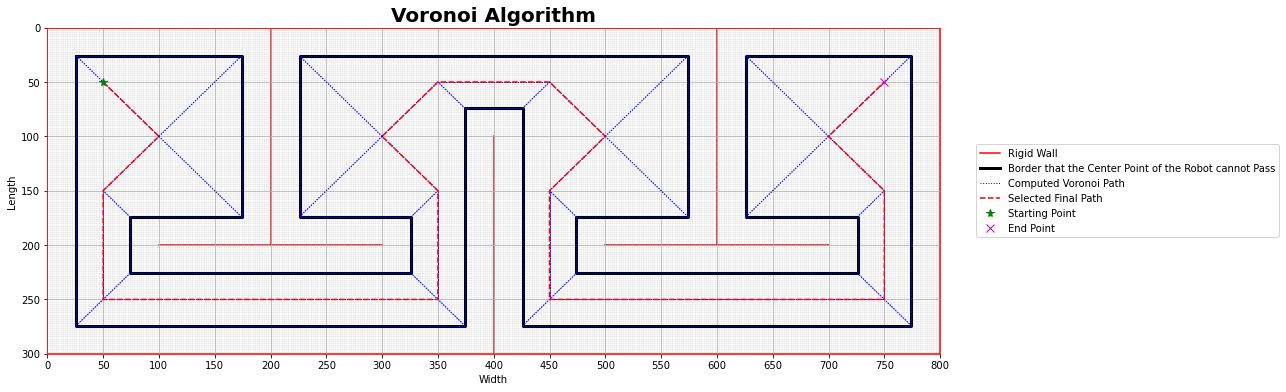

In [7]:
# Borders Polygon
border_Poly = sg.Polygon([sg.Point2(obs_corns[7,0], obs_corns[7,1]), sg.Point2(obs_corns[6,0], obs_corns[6,1]),
                          sg.Point2(obs_corns[5,0], obs_corns[5,1]), sg.Point2(obs_corns[4,0], obs_corns[4,1]), 
                          sg.Point2(obs_corns[3,0], obs_corns[3,1]), sg.Point2(obs_corns[2,0], obs_corns[2,1]), 
                          sg.Point2(obs_corns[1,0], obs_corns[1,1]), sg.Point2(obs_corns[0,0], obs_corns[0,1]), 
                          sg.Point2(obs_corns[23,0], obs_corns[23,1]), sg.Point2(obs_corns[22,0], obs_corns[22,1]), 
                          sg.Point2(obs_corns[21,0], obs_corns[21,1]), sg.Point2(obs_corns[20,0], obs_corns[20,1]),
                          sg.Point2(obs_corns[19,0], obs_corns[19,1]), sg.Point2(obs_corns[18,0], obs_corns[18,1]),
                          sg.Point2(obs_corns[17,0], obs_corns[17,1]), sg.Point2(obs_corns[16,0], obs_corns[16,1]), 
                          sg.Point2(obs_corns[15,0], obs_corns[15,1]), sg.Point2(obs_corns[14,0], obs_corns[14,1]), 
                          sg.Point2(obs_corns[13,0], obs_corns[13,1]), sg.Point2(obs_corns[12,0], obs_corns[12,1]), 
                          sg.Point2(obs_corns[11,0], obs_corns[11,1]), sg.Point2(obs_corns[10,0], obs_corns[10,1]), 
                          sg.Point2(obs_corns[9,0], obs_corns[9,1]), sg.Point2(obs_corns[8,0], obs_corns[8,1])])

class Voronoi_Algorithm:
    
    def __init__(self, obstacles, grid_res, border_Poly, angle_res, robot_Size = 1.0):
        
        # obstacles       : An array of obstacle nodes [[ox_1, oy_1], [ox_2, oy_2], [ox_3, oy_3], ...]
        # border_Poly     : Polygon of the border
        # grid_resolution : resolution of the grid in unit
        # angle_resolution: resolution of the grid in degree
        # robot_Size      : Maximum radius of the robot
        
        # Step 1: Initialization
        # Obstacles array
        self.obstacles = obstacles
        # Grid resolution
        self.grid_res = grid_res
        # Angle resolution
        self.angle_res = angle_res
        # Robot size
        self.robot_Size = robot_Size
        # Polygon of the border
        self.polygon = border_Poly
        
        # Step 2: Data Extraction
        # Determine the lower and upper bounds of the configuration space
        self.min_Width = min(self.obstacles[:, 0])
        self.max_Width = max(self.obstacles[:, 0])
        self.min_Length = min(self.obstacles[:, 1])
        self.max_Length = max(self.obstacles[:, 1])
        
        # Create border skeleton from the its polygon
        self.border_skel = sg.skeleton.create_interior_straight_skeleton(self.polygon)

        # Create a list to store the vertices of the skeleton
        self.vertices_skel = []

        # Loop through all the vertices from the skeleton object
        for vertex in self.border_skel.vertices:
    
            # Store the vertices of the skeleton
            self.vertices_skel.append(np.array([vertex.point.x(), vertex.point.y()]))

        # Convert to array
        self.vertices_skel = np.array(self.vertices_skel)
    
    
    def __call__(self, strt_pt, end_pt):
        
        # Convert obstacles array to list
        obs_arr = self.obstacles
        obs_list = obs_arr.tolist()
        
        # Edge list that store skeleton edges
        skel_edges = []
        
        # Iteration counte
        iteration = 1
        
        # Plot the skeleton
        for h in self.border_skel.halfedges:
            
            # Extract skeleton vertices
            v_1 = h.vertex.point
            v_2 = h.opposite.vertex.point
            v_1_pt = np.array([v_1.x(), v_1.y()])
            v_2_pt = np.array([v_2.x(), v_2.y()])
            
            # Label only once
            if iteration == 1:
                
                # Plot with label
                plt.plot([v_1.x(), v_2.x()], [v_1.y(), v_2.y()], 'b:', lw = 1, label = "Computed Voronoi Path")
                
            else:
                
                # Plot without label
                plt.plot([v_1.x(), v_2.x()], [v_1.y(), v_2.y()], 'b:', lw = 1)
            
            # Update iteration count
            iteration = iteration + 1
            
            # Ensure those vertices does not collide with the border
            if np.any(np.all(v_1_pt == obs_list, axis=1)):
                continue          
            if np.any(np.all(v_2_pt == obs_list, axis=1)):
                continue
            
            # Only store the edges that does not touch the borders
            skel_edges.append(np.array([v_1.x(), v_1.y(), v_2.x(), v_2.y()]))
            
        # Convert to array
        skel_edges = np.array(skel_edges)
            
        # Initialize starting edges that store vertices
        start_edge = []
        start_edge.append(strt_pt) # add starting point to the
        
        # Set that store calculated euclidean distance
        distances = []
        
        # Find the nearest vertex from the starting point
        for idx in range (0, self.vertices_skel.shape[0]):
            
            # Eucledian distance
            x_delta = self.vertices_skel[idx, 0] - strt_pt[0]
            y_delta = self.vertices_skel[idx, 1] - strt_pt[1]
            dist = math.sqrt(x_delta*x_delta + y_delta*y_delta)
            # Add to the list
            distances.append([dist, idx])
        
            # Sort the distances list from small to large
            distances.sort()
        
            # Choose the lowest 3
            distances = distances[:3]
        
        # Determine which vertex to connect to from the starting point
        for dist, idx in distances:
            
            # Node to check
            node_check = np.array([self.vertices_skel[idx, 0], self.vertices_skel[idx, 1]])
            
            # If the node is in the list
            if np.any(np.all(node_check == obs_list, axis=1)):
                
                # Skip this loop
                continue
                
            else:
                
                # Add to the start edge list
                start_edge.append(np.array([self.vertices_skel[idx, 0], self.vertices_skel[idx, 1]]))
                
                break
                
        # Convert to array
        start_edge = np.array(start_edge)
        
        # Initialize ending edges that store vertices
        end_edge = []
        
        # Set that store calculated euclidean distance
        distances = []
        
        # Find the nearest vertex from the ending point
        for idx in range (0, self.vertices_skel.shape[0]):
            
            # Eucledian distance
            x_delta = self.vertices_skel[idx, 0] - end_pt[0]
            y_delta = self.vertices_skel[idx, 1] - end_pt[1]
            dist = math.sqrt(x_delta*x_delta + y_delta*y_delta)
            # Add to the list
            distances.append([dist, idx])
        
            # Sort the distances list from small to large
            distances.sort()
        
            # Choose the lowest 3
            distances = distances[:3]
        
        for dist, idx in distances:
            
            # Node to check
            node_check = np.array([self.vertices_skel[idx, 0], self.vertices_skel[idx, 1]])
            
            # If the node is in the list
            if np.any(np.all(node_check == obs_list, axis=1)):
                
                # Skip this loop
                continue
                
            else:
                
                # Add to the end edge list
                end_edge.append(np.array([self.vertices_skel[idx, 0], self.vertices_skel[idx, 1]]))
                
                break
        
        # Add ending point to the
        end_edge.append(end_pt) 
        
        # Convert to array
        end_edge = np.array(end_edge)
        
        # Flatten the start edge and end edge array
        #start_edge = start_edge.flatten()
        #end_edge = end_edge.flatten()
        
        # Initialize the final path
        route = []
        # Add starting edge to the route list
        route.append(start_edge[0])
        route.append(start_edge[1])
        
        # Initialize current node
        curr_node = start_edge[1,:]
        prev_node = start_edge[0,:]
        
        # Arrange the sequence of the final path from start to finish
        for iteration in range(0, skel_edges.shape[0]):
            
            for idx in range(0, skel_edges.shape[0]):
                
                # Skip duplicate edge
                if curr_node[0] == skel_edges[idx, 0] and curr_node[1] == skel_edges[idx, 1] and prev_node[0] == skel_edges[idx, 2] and prev_node[1] == skel_edges[idx, 3]:
                    
                    continue
                
                # Find the next vertex
                if curr_node[0] == skel_edges[idx, 0] and curr_node[1] == skel_edges[idx, 1]:
                    
                    prev_node = curr_node
                    curr_node = np.array([skel_edges[idx, 2], skel_edges[idx, 3]])

                    route.append(curr_node)
                    
                    break
        # Add starting edge to the route list
        route.append(end_edge[0])
        route.append(end_edge[1])
                    
        # Convert to array
        route = np.array(route)
        
        return route
            
### A.) Plot the Configuration Space
## 1.) Try plotting workspace first
# a.) Define figure and axis, and set figure size
fig, ax = plt.subplots(figsize = (16, 6))

# b.) Label axis
plt.xlabel('Width')
plt.ylabel('Length')

# c.) Set axis limit
plt.xlim(map_size_Width)
plt.ylim(map_size_Length)
plt.gca().invert_yaxis()

# d.) Plot major grid
ax.set_xticks(major_grid_Width)
ax.set_yticks(major_grid_Length)
plt.grid(visible = True, which = 'major', linestyle='-') # Major grid parameters

# e.) Plot minor grid
ax.set_xticks(minor_grid_Width, minor = True)  # Set the grid resolution to 2 x 2
ax.set_yticks(minor_grid_Length, minor = True) # Set the grid resolution to 2 x 2
plt.grid(visible = True, which = 'minor', linestyle='-', alpha=0.2) # Minor grid parameters
ax.tick_params(which='minor', bottom=False, left=False) # Hide grid

# f.) Plot walls in red
# Outer walls
for spine in ax.spines.values():
    
    spine.set_edgecolor('red')
    
# Inner walls
for idx in range(0, thin_walls.shape[0]):
    
    if idx == 1:
        
        plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', label = "Rigid Wall", zorder = 1)
        continue
        
    plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', zorder = 1)
    
#plt.scatter(obstacles[:,0], obstacles[:,1], color = 'black', label = "Border Corners")
plt.plot(obs_corns[:,0], obs_corns[:,1], '-k', label = "Border that the Center Point of the Robot cannot Pass", lw = 3, zorder = 2)

# h.) Run greedy algorithm
voronoi_alg = Voronoi_Algorithm(obstacles, grid_res, border_Poly, angle_res)
best_path = voronoi_alg(strt_pt, end_pt)
plt.plot(best_path[:, 0], best_path[:, 1], "--r", label = 'Selected Final Path') # Plot the final path

# i.) Plot the starting location and the ending location
plt.plot(strt_pt[0], strt_pt[1], 'g*', label ="Starting Point", markersize = 8)
plt.plot(end_pt[0], end_pt[1], 'mx', label ="End Point", markersize = 8)

# j.) Plot title
plt.title("Voronoi Algorithm", fontsize = 20, fontweight = "bold")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

# Show the final plot
plt.show()


In [8]:
# Calculate the total length of the path
Voronoi_path_length = 0

for idx in range(0, best_path.shape[0] - 1):
    
    # Euclidean Distance
    x_delta = best_path[idx, 0] - best_path[idx + 1, 0]
    x_delta_sq = x_delta*x_delta
    y_delta = best_path[idx, 1] - best_path[idx + 1, 1]
    y_delta_sq = y_delta*y_delta
    edge_length = math.sqrt(x_delta_sq + y_delta_sq)
    
    # Cumulated distance
    Voronoi_path_length = Voronoi_path_length + edge_length
    
print("Voronoi Algorithm (Medical Axis) Path Length: ", Voronoi_path_length, " units")

Voronoi Algorithm (Medical Axis) Path Length:  1665.685424949238  units


### Problem 4
Use probabilistic roadmaps (PRM) to compute a path between start and end-points with 50, 100 and 500 sample points. What is the difference in path length? Illustrate each computed path.

#### a.) 50 samples

Congratulations! A complete path is found.


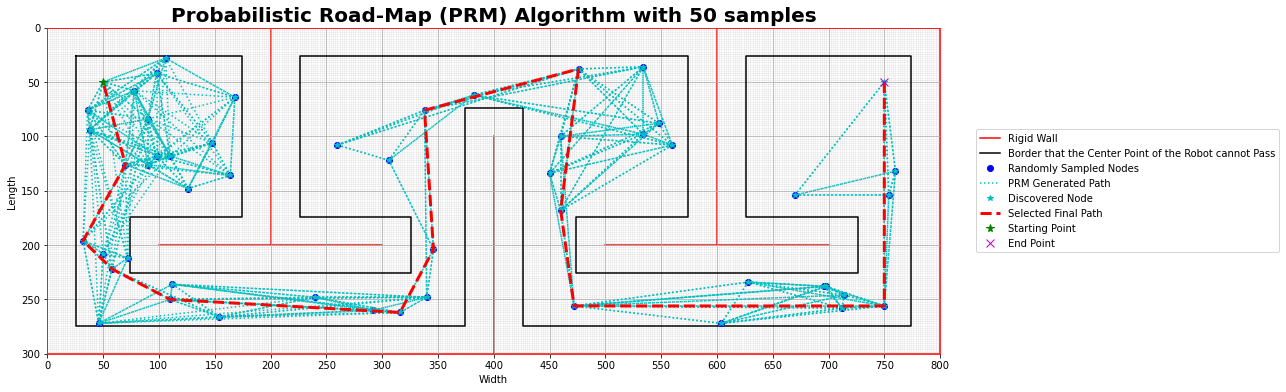

In [21]:
# Create obstacles list that store all the obstacle nodes
obs_list_PRM = []

### Draw the obstacles
## Outer Walls
# Top
for depth in range(0, robot_Size + grid_res, grid_res):
    
    for idx in range(0 , 800 + grid_res, grid_res):
        
        obs_node = [idx, depth]
        obs_list_PRM.append(obs_node)
    
# Right
for width in range(800, 800 - robot_Size - grid_res, -grid_res):
    
    for idx in range(0 , 300 + grid_res, grid_res):
    
        obs_node = [width, idx]
        obs_list_PRM.append(obs_node)
    
# Bottom
for depth in range(300, 300 - robot_Size - grid_res, -grid_res):
    
    for idx in range(800 , 0 - grid_res, -grid_res):
    
        obs_node = [idx, depth]
        obs_list_PRM.append(obs_node)
    
# Left
for width in range(0, robot_Size + grid_res, grid_res):
    
    for idx in range(300 , 0 - grid_res, -grid_res):
    
        obs_node = [width, idx]
        obs_list_PRM.append(obs_node)
    
## Inner Walls (Left to Right)
for width in range(200 - robot_Size, 200 + robot_Size + grid_res, grid_res):
    
    for idx in range(0 , 200 + grid_res, grid_res):
        
        obs_node = [width, idx]
        obs_list_PRM.append(obs_node)
        
for depth in range(200 - robot_Size, 200 + robot_Size + grid_res, grid_res):
    
    for idx in range(100 - robot_Size, 300 + robot_Size + grid_res, grid_res):
    
        obs_node = [idx, depth]
        obs_list_PRM.append(obs_node)

for width in range(400 - robot_Size, 400 + robot_Size + grid_res, grid_res):
    
    for idx in range(100 - robot_Size, 300 + grid_res, grid_res):
    
        obs_node = [width, idx]
        obs_list_PRM.append(obs_node)
        
for width in range(600 - robot_Size, 600 + robot_Size + grid_res, grid_res):
    
    for idx in range(0 , 200 + grid_res, grid_res):
    
        obs_node = [width, idx]
        obs_list_PRM.append(obs_node)

for depth in range(200 - robot_Size, 200 + robot_Size + grid_res, grid_res):
    for idx in range(500 - robot_Size, 700 + robot_Size + grid_res, grid_res):
    
        obs_node = [idx, depth]
        obs_list_PRM.append(obs_node)
    
# Convert to array
obs_array_PRM = np.array(obs_list_PRM)

class PRM_Algorithm():
    
    def __init__(self, obs_array_PRM, grid_res, angle_res, robot_Size, kNN, max_num_Samples):
    
        # obs_array_PRM   : An array of obstacle nodes [[ox_1, oy_1], [ox_2, oy_2], [ox_3, oy_3], ...]
        # grid_resolution : resolution of the grid in unit
        # angle_resolution: resolution of the grid in degree
        # robot_Size      : Maximum radius of the robot
        # kNN             : k nearest neighbour
        # max_num_Samples : Maximum number of samples/iterations
        
        # Step 1: Initialization
        # Obstacles array
        self.obs_array_PRM = obs_array_PRM
        # Grid resolution
        self.grid_res = grid_res
        # Angle resolution
        self.angle_res = angle_res
        # Robot size
        self.robot_Size = robot_Size
        # Max number of neighbors
        self.kNN = kNN
        # Maximum iterations
        self.max_num_Samples = max_num_Samples
        
        # Step 2: Data Extraction
        # Determine the lower and upper bounds of the workspace
        self.min_x = min(self.obs_array_PRM[:, 0])
        self.max_x = max(self.obs_array_PRM[:, 0])
        self.min_y = min(self.obs_array_PRM[:, 1])
        self.max_y = max(self.obs_array_PRM[:, 1])
        
    # Create a unique ID for the PRM Graph dictionary
    def node_uniq_ID(self, PRM_node):
        
        # x_coord digit 1 , x_coord digit 2, x_coord digit 3, y_coord digit 1 , y_coord digit 2, y_coord digit 3
        uniq_ID = PRM_node.x * 1000 + PRM_node.y
        
        return uniq_ID
    
    # Euclidean distance
    def euclidean_dist(self, n1_x, n1_y, n2_x, n2_y):
        
        return math.sqrt(abs(n1_x - n2_x)**2 +abs(n1_y - n2_y)**2)
    
    # Call function    
    def __call__(self, strt_pt, end_pt):
        
        # Create a PRM Graph dictionary
        PRM_Graph = {}
        
        # Initial node
        init_Node = self.PRM_node(strt_pt[0], strt_pt[1], 0, -1 )
        
        # Final node
        final_Node = self.PRM_node(end_pt[0], end_pt[1], 0, -1 )
        
        # Initialize PRM nodes list [[x1, y1],[x2, y2],...]
        PRM_nodes_list = []
        
        # Initialize PRM sample count
        PRM_sample_count = 1
        
        # Start the iteration
        while PRM_sample_count <= self.max_num_Samples:
            
            # Get a random node x-coordinate
            nd_rand_x = random.randrange(self.min_x, self.max_x, grid_res)
            # Get a random node y-coordinate
            nd_rand_y = random.randrange(self.min_y, self.max_y, grid_res)
            # Random node
            nd_rand = np.array([nd_rand_x, nd_rand_y])
            rand_Node = self.PRM_node(nd_rand_x, nd_rand_y, 0, -1)
            nd_rand_ID = self.node_uniq_ID(rand_Node)
            
            # If the node is the same as initial node
            if nd_rand_ID == self.node_uniq_ID(init_Node):
                
                # Skip this loop
                continue
            
            # If the node is the same as final node
            if nd_rand_ID == self.node_uniq_ID(final_Node):
                
                # Skip this loop
                continue
            
            # Check whether the node is in the PRM Graph dictionary
            if nd_rand_ID in PRM_Graph:
                    
                # Skip this loop
                continue
            
            # Check for collision
            if np.any(np.all(nd_rand == obs_list_PRM, axis=1)):
                    
                # Skip this loop
                continue
                
            # Include the node to the PRM graph
            PRM_nodes_list.append(nd_rand)
            if PRM_sample_count == 1:
                
                # Label once
                plt.plot(nd_rand_x, nd_rand_y, "ob", label = "Randomly Sampled Nodes")
                
            else:
                
                plt.plot(nd_rand_x, nd_rand_y, "ob")
            
            # Update the count
            PRM_sample_count = PRM_sample_count + 1
            
        # Include the initial and final nodes to the PRM node list
        PRM_nodes_list.append(strt_pt)
        PRM_nodes_list.append(end_pt)
        
        # Convert the PRM nodes list to array
        PRM_nodes_array = np.array(PRM_nodes_list)
        
        ## Generate PRM edges
        # Initialize the list that stores all the edges information
        PRM_edges_list = []
        # Number of Combination between Vertices (from nearest to furthest)
        vertices_Comb = cKDTree(PRM_nodes_array)
        
        iteration_label = 1
        
        for idx, [x_coord, y_coord] in enumerate(PRM_nodes_array):
            
            # Extract the distances and indices information from each node
            euclid_distances, indices = vertices_Comb.query([x_coord, y_coord], k = PRM_nodes_array.shape[0])
            
            # Create a list that stores information that the nodes connects to which other nodes
            edges_idx_list = []
            
            # Start from 1 because the index 0 is the same coordinate
            for idx_2 in range(1, PRM_nodes_array.shape[0]):
                
                # Find the neighbor node from the PRM nodes array
                neighbor_node = PRM_nodes_array[indices[idx_2],:]
                
                # Generate Nodes along the edge
                edge_nodes = line_nd((x_coord, y_coord), (neighbor_node[0], neighbor_node[1]), endpoint=True)
                # Convert to array
                edge_nodes = np.array(edge_nodes)
                # Reshape it to number of nodes x 2
                edge_nodes = edge_nodes.T
                # Round up to grid resolution
                edge_nodes = grid_res * np.round(edge_nodes/grid_res)
            
                # Check for possible collision
                # Initialize collision status
                collision_status = False
            
                # Check each and every nodes along the edge
                for idx in range(0, edge_nodes.shape[0]):
                
                    # If collision detected
                    if np.any(np.all(edge_nodes[idx, :] == obs_list_PRM, axis=1)):
                    
                        # Update collision status
                        collision_status = True
                    
                        # Break the second for loop
                        break
                    
                # If no collision 
                if collision_status == False:
                    
                    # Store neighbor node index for this node
                    edges_idx_list.append(indices[idx_2])
                    
                    # Label once
                    if iteration_label == 1 :
                        
                        # Plot the edges
                        plt.plot([x_coord, neighbor_node[0]],[y_coord, neighbor_node[1]],":c", label = "PRM Generated Path")
                        
                        iteration_label = iteration_label + 1
                        
                    else:
                        
                        # Plot the edges
                        plt.plot([x_coord, neighbor_node[0]],[y_coord, neighbor_node[1]],":c")
                
                # Store maximum number of neigbours if possible
                if len(edges_idx_list) >= self.kNN:
                
                    # Stop the second for loop
                    break
            
            # Add to the PRM edges list
            PRM_edges_list.append(edges_idx_list)
            
        
        ##########################################################################################
        # Greedy Algorithm on PRM
        ##########################################################################################
        
        # Create visited and unexplored dictionary.
        visited_nodes_set = {}
        unexplored_nodes_set = {}
        
        # Initial node
        init_Node = self.PRM_node(strt_pt[0], strt_pt[1], 0, -1 )
        
        # Final node
        final_Node = self.PRM_node(end_pt[0], end_pt[1], 0, -1 )
        
        # Iteration Count 
        iteration_count = 1
        
        # Include the initial node to the unexplored set
        unexplored_nodes_set[len(PRM_edges_list) -2] = init_Node
        
        # Initialize complete path status
        complete_path_status = True
        
        # Start grid searching with while loop until the end point is found
        while True:
            
            # If path is incomplete / all sub-group nodes are explored
            if not unexplored_nodes_set:
                
                # Update path status
                complete_path_status = False
                
                # Print status
                print("Final node cannot be reached from the starting node. Please adjust the number of samples.")
                
                break
            
            # Search the node with the lowest cost
            best_id = min(unexplored_nodes_set, key=lambda x: unexplored_nodes_set[x].cost)
            
            # Best node
            best_node = unexplored_nodes_set[best_id]
            
            if iteration_count == 1:
                # Plot discovered nodes
                plt.plot(best_node.x, best_node.y, "*c", label = "Discovered Node")
            
            else:
                # Plot discovered nodes
                plt.plot(best_node.x, best_node.y, "*c")
                
            # Update iteration count
            iteration_count = iteration_count +1
            
            # If it is the final node
            if best_id == (len(PRM_edges_list) -1):
                
                # Final Node cost has the same previous index as the current best node previous index
                final_Node.parent_node_id = best_node.parent_node_id
                
                # Final Node cost is the current best node cost
                final_Node.cost = best_node.cost
                
                # End the while loop
                break
                
            # Include the best node to visited node set
            visited_nodes_set[best_id] = best_node
            
            # Remove the best node item from the unexplored node set/dictionary
            unexplored_nodes_set.pop(best_id)
            
            # Search the connected vertices
            for neighbour_ID in range(0, len(PRM_edges_list[best_id])):
                
                # Expanded node index
                expanded_node_idx = PRM_edges_list[best_id][neighbour_ID]
                
                # Calculate euclidean distance
                euclid_dist = self.euclidean_dist(PRM_nodes_array[expanded_node_idx, 0], PRM_nodes_array[expanded_node_idx, 1], best_node.x, best_node.y)
                
                # Define the expanded node
                expanded_node = self.PRM_node(PRM_nodes_array[expanded_node_idx, 0],
                                              PRM_nodes_array[expanded_node_idx, 1],
                                              best_node.cost + euclid_dist,
                                              best_id)
                
                # Check whether it is a visited node
                if expanded_node_idx in visited_nodes_set:
                    
                    # Skip this loop
                    continue
                    
                # If the node is not in the unvisited set but discovered
                if expanded_node_idx not in unexplored_nodes_set:
                    
                    # Add to the unexplored set
                    unexplored_nodes_set[expanded_node_idx] = expanded_node
                    
                else:
                    
                    # If discovered but the current one has lesser cost than the previous
                    if expanded_node.cost < unexplored_nodes_set[expanded_node_idx].cost:
                        
                        # Update the cost and parent node index
                        unexplored_nodes_set[expanded_node_idx].cost = expanded_node.cost
                        unexplored_nodes_set[expanded_node_idx].parent_node_id = expanded_node.parent_node_id
                        
        if complete_path_status == False:
            
            # Empty path
            final_path = [[],[]]
            final_path = np.array(final_path)# Convert to array
            
            return final_path
                     
        # Determine the final path
        # Store best path from final node to start
        final_path = []
        
        # Add the final node to the best path
        final_path.append(np.array([final_Node.x, final_Node.y]))
        
        # Previous node of the final node
        previous_idx = final_Node.parent_node_id
        
        # While not the starting node
        while previous_idx != -1:
            
            # Node from visited set
            node_visited = visited_nodes_set[previous_idx]
            final_path.append(np.array([node_visited.x, node_visited.y]))
            # Update the previous index
            previous_idx = node_visited.parent_node_id
            
        # convert best_path from list to array
        final_path = np.array(final_path)
        
        # Print status
        print("Congratulations! A complete path is found.")

        return final_path
    
    # Create subclass for PRM nodes
    class PRM_node:

        def __init__(self, x, y, cost, parent_node_id):
            
            # x-coordinate of the node
            self.x = x
            # y-coordinate of the node
            self.y = y
            # cost (Distance travelled)
            self.cost = cost
            # Node parent key
            self.parent_node_id = parent_node_id
            
        def __call__(self):
            
            # If the node is called, return an array of node information
            return np.array([self.x, self.y, self.cost, self.parent_node_id])


### A.) Plot the Configuration Space
## 1.) Try plotting workspace first
# a.) Define figure and axis, and set figure size
fig, ax = plt.subplots(figsize = (16, 6))

# b.) Label axis
plt.xlabel('Width')
plt.ylabel('Length')

# c.) Set axis limit
plt.xlim(map_size_Width)
plt.ylim(map_size_Length)
plt.gca().invert_yaxis()

# d.) Plot major grid
ax.set_xticks(major_grid_Width)
ax.set_yticks(major_grid_Length)
plt.grid(visible = True, which = 'major', linestyle='-') # Major grid parameters

# e.) Plot minor grid
ax.set_xticks(minor_grid_Width, minor = True)  # Set the grid resolution to 2 x 2
ax.set_yticks(minor_grid_Length, minor = True) # Set the grid resolution to 2 x 2
plt.grid(visible = True, which = 'minor', linestyle='-', alpha=0.2) # Minor grid parameters
ax.tick_params(which='minor', bottom=False, left=False) # Hide grid

# f.) Plot walls in red
# Outer walls
for spine in ax.spines.values():
    
    spine.set_edgecolor('red')
    
# Inner walls
for idx in range(0, thin_walls.shape[0]):
    
    if idx == 1:
        
        plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', label = "Rigid Wall", zorder = 1)
        continue
        
    plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', zorder = 1)
    
#plt.scatter(obs_array_RRT[:,0], obs_array_RRT[:,1], color = 'black', label = "Walls")
plt.plot(obs_corns[:,0], obs_corns[:,1], '-k', label = "Border that the Center Point of the Robot cannot Pass")

# h.) Run PRM algorithm
prm_alg = PRM_Algorithm(obs_array_PRM, grid_res, angle_res, robot_Size, kNN = 10, max_num_Samples = 50)
best_path = prm_alg(strt_pt, end_pt)
# If not empty path
if best_path.shape[1] != 0:
    # Plot the path
    plt.plot(best_path[:, 0], best_path[:, 1], "--r", lw = 3, label = 'Selected Final Path') # Plot the final path

# i.) Plot the starting location and the ending location
plt.plot(strt_pt[0], strt_pt[1], 'g*', label ="Starting Point", markersize = 8)
plt.plot(end_pt[0], end_pt[1], 'mx', label ="End Point", markersize = 8)

# j.) Plot title
plt.title("Probabilistic Road-Map (PRM) Algorithm with 50 samples", fontsize = 20, fontweight = "bold")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

# Show the final plot
plt.show()

In [22]:
# Calculate the total length of the PRM path
PRM_path_length = 0

for idx in range(0, best_path.shape[0] - 1):
    
    # Euclidean Distance
    x_delta = best_path[idx, 0] - best_path[idx + 1, 0]
    x_delta_sq = x_delta*x_delta
    y_delta = best_path[idx, 1] - best_path[idx + 1, 1]
    y_delta_sq = y_delta*y_delta
    edge_length = math.sqrt(x_delta_sq + y_delta_sq)
    
    # Cumulated distance
    PRM_path_length = PRM_path_length + edge_length
    
print("PRM Algorithm Path Length with 50 samples: ", PRM_path_length, " units")

PRM Algorithm Path Length with 50 samples:  1500.8955190162997  units


#### b.) 100 samples

Congratulations! A complete path is found.


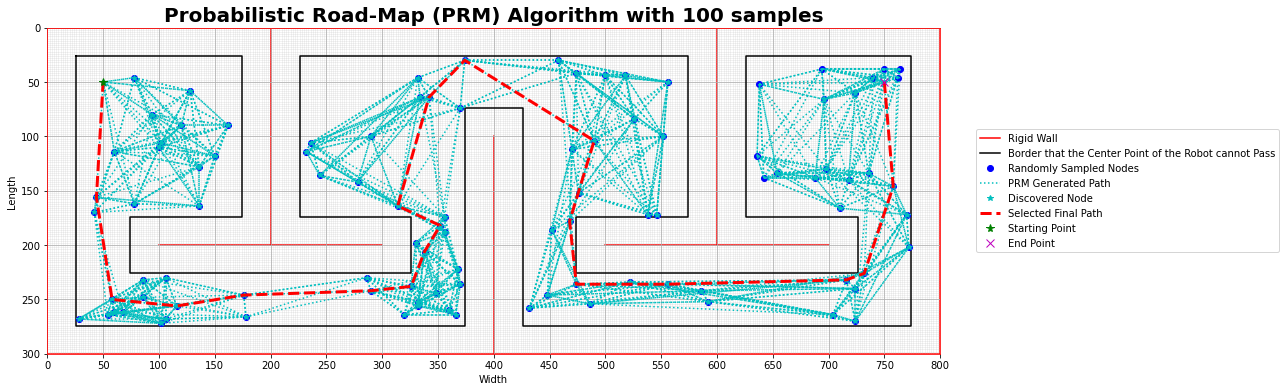

In [23]:
### A.) Plot the Configuration Space
## 1.) Try plotting workspace first
# a.) Define figure and axis, and set figure size
fig, ax = plt.subplots(figsize = (16, 6))

# b.) Label axis
plt.xlabel('Width')
plt.ylabel('Length')

# c.) Set axis limit
plt.xlim(map_size_Width)
plt.ylim(map_size_Length)
plt.gca().invert_yaxis()

# d.) Plot major grid
ax.set_xticks(major_grid_Width)
ax.set_yticks(major_grid_Length)
plt.grid(visible = True, which = 'major', linestyle='-') # Major grid parameters

# e.) Plot minor grid
ax.set_xticks(minor_grid_Width, minor = True)  # Set the grid resolution to 2 x 2
ax.set_yticks(minor_grid_Length, minor = True) # Set the grid resolution to 2 x 2
plt.grid(visible = True, which = 'minor', linestyle='-', alpha=0.2) # Minor grid parameters
ax.tick_params(which='minor', bottom=False, left=False) # Hide grid

# f.) Plot walls in red
# Outer walls
for spine in ax.spines.values():
    
    spine.set_edgecolor('red')
    
# Inner walls
for idx in range(0, thin_walls.shape[0]):
    
    if idx == 1:
        
        plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', label = "Rigid Wall", zorder = 1)
        continue
        
    plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', zorder = 1)
    
#plt.scatter(obs_array_RRT[:,0], obs_array_RRT[:,1], color = 'black', label = "Walls")
plt.plot(obs_corns[:,0], obs_corns[:,1], '-k', label = "Border that the Center Point of the Robot cannot Pass")

# h.) Run PRM algorithm
prm_alg = PRM_Algorithm(obs_array_PRM, grid_res, angle_res, robot_Size, kNN = 10, max_num_Samples = 100)
best_path = prm_alg(strt_pt, end_pt)
# If not empty path
if best_path.shape[1] != 0:
    # Plot the path
    plt.plot(best_path[:, 0], best_path[:, 1], "--r", lw = 3, label = 'Selected Final Path') # Plot the final path

# i.) Plot the starting location and the ending location
plt.plot(strt_pt[0], strt_pt[1], 'g*', label ="Starting Point", markersize = 8)
plt.plot(end_pt[0], end_pt[1], 'mx', label ="End Point", markersize = 8)

# j.) Plot title
plt.title("Probabilistic Road-Map (PRM) Algorithm with 100 samples", fontsize = 20, fontweight = "bold")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

# Show the final plot
plt.show()

In [24]:
# Calculate the total length of the PRM path
PRM_path_length = 0

for idx in range(0, best_path.shape[0] - 1):
    
    # Euclidean Distance
    x_delta = best_path[idx, 0] - best_path[idx + 1, 0]
    x_delta_sq = x_delta*x_delta
    y_delta = best_path[idx, 1] - best_path[idx + 1, 1]
    y_delta_sq = y_delta*y_delta
    edge_length = math.sqrt(x_delta_sq + y_delta_sq)
    
    # Cumulated distance
    PRM_path_length = PRM_path_length + edge_length
    
print("PRM Algorithm Path Length with 100 samples: ", PRM_path_length, " units")

PRM Algorithm Path Length with 100 samples:  1437.8742335935567  units


#### c.) 150 samples

Congratulations! A complete path is found.


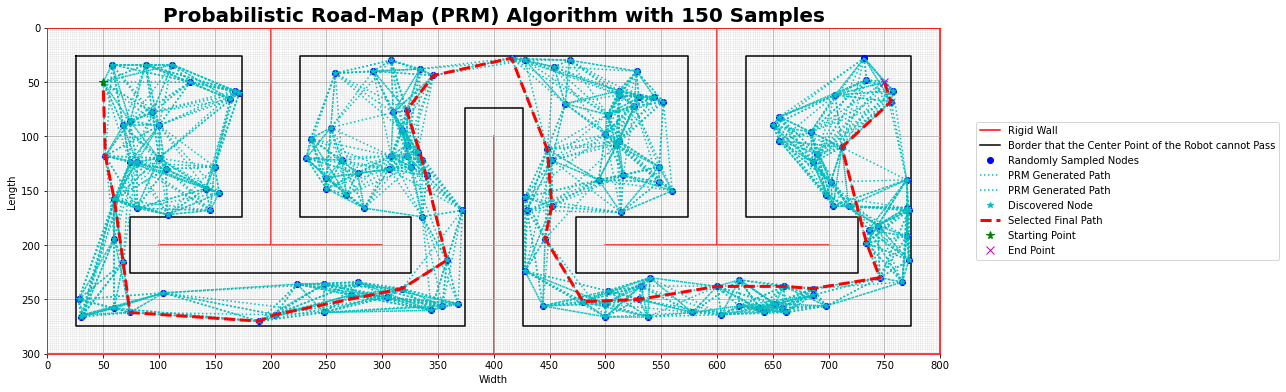

In [17]:
### A.) Plot the Configuration Space
## 1.) Try plotting workspace first
# a.) Define figure and axis, and set figure size
fig, ax = plt.subplots(figsize = (16, 6))

# b.) Label axis
plt.xlabel('Width')
plt.ylabel('Length')

# c.) Set axis limit
plt.xlim(map_size_Width)
plt.ylim(map_size_Length)
plt.gca().invert_yaxis()

# d.) Plot major grid
ax.set_xticks(major_grid_Width)
ax.set_yticks(major_grid_Length)
plt.grid(visible = True, which = 'major', linestyle='-') # Major grid parameters

# e.) Plot minor grid
ax.set_xticks(minor_grid_Width, minor = True)  # Set the grid resolution to 2 x 2
ax.set_yticks(minor_grid_Length, minor = True) # Set the grid resolution to 2 x 2
plt.grid(visible = True, which = 'minor', linestyle='-', alpha=0.2) # Minor grid parameters
ax.tick_params(which='minor', bottom=False, left=False) # Hide grid

# f.) Plot walls in red
# Outer walls
for spine in ax.spines.values():
    
    spine.set_edgecolor('red')
    
# Inner walls
for idx in range(0, thin_walls.shape[0]):
    
    if idx == 1:
        
        plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', label = "Rigid Wall", zorder = 1)
        continue
        
    plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', zorder = 1)
    
#plt.scatter(obs_array_RRT[:,0], obs_array_RRT[:,1], color = 'black', label = "Walls")
plt.plot(obs_corns[:,0], obs_corns[:,1], '-k', label = "Border that the Center Point of the Robot cannot Pass")

# h.) Run PRM algorithm
prm_alg = PRM_Algorithm(obs_array_PRM, grid_res, angle_res, robot_Size, kNN = 10, max_num_Samples = 150)
best_path = prm_alg(strt_pt, end_pt)
# If not empty path
if best_path.shape[1] != 0:
    # Plot the path
    plt.plot(best_path[:, 0], best_path[:, 1], "--r", lw = 3, label = 'Selected Final Path') # Plot the final path

# i.) Plot the starting location and the ending location
plt.plot(strt_pt[0], strt_pt[1], 'g*', label ="Starting Point", markersize = 8)
plt.plot(end_pt[0], end_pt[1], 'mx', label ="End Point", markersize = 8)

# j.) Plot title
plt.title("Probabilistic Road-Map (PRM) Algorithm with 150 Samples", fontsize = 20, fontweight = "bold")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

# Show the final plot
plt.show()

In [18]:
# Calculate the total length of the PRM path
PRM_path_length = 0

for idx in range(0, best_path.shape[0] - 1):
    
    # Euclidean Distance
    x_delta = best_path[idx, 0] - best_path[idx + 1, 0]
    x_delta_sq = x_delta*x_delta
    y_delta = best_path[idx, 1] - best_path[idx + 1, 1]
    y_delta_sq = y_delta*y_delta
    edge_length = math.sqrt(x_delta_sq + y_delta_sq)
    
    # Cumulated distance
    PRM_path_length = PRM_path_length + edge_length
    
print("PRM Algorithm Path Length with 150 samples: ", PRM_path_length, " units")

PRM Algorithm Path Length with 150 samples:  1476.4748865381866  units


**Comments on the difference in path length of 50, 100, and 150 samples:**<br>
As the number of the samples increases, the higher the density of the generated probabilistic roadmaps (PRM) nodes. The length of the edges that connect the 2 vertices are shorter due to higher density of the generated probabilistic roadmaps (PRM) nodes. As a results, increasing the number of samples creates a more refined path, which decreases the length of the final path. Besides that, if the number of samples is too low or insufficient, it might not generate a final path due to the low density of the PRM nodes; some vertices are unable to connect to their nearest k (i.e., 10 for all different samples) neighbours due to obstacle in their way.

### Problem 5
Do the same with Rapid exploring random trees (RRT). What are the main differences in performance between PRM and RRT? Illustrate each path.

#### a.) 50 samples

Number of iteration:  50


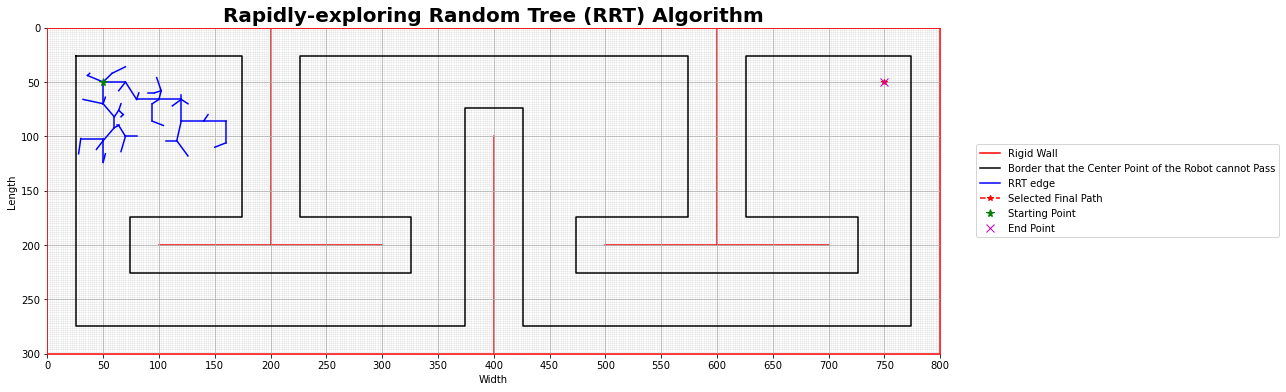

In [47]:
# Create obstacles list that store all the obstacle nodes
obs_list_RRT = []

### Draw the obstacles
## Outer Walls
# Top
for depth in range(0, robot_Size + grid_res, grid_res):
    
    for idx in range(0 , 800 + grid_res, grid_res):
        
        obs_node = [idx, depth]
        obs_list_RRT.append(obs_node)
    
# Right
for width in range(800, 800 - robot_Size - grid_res, -grid_res):
    
    for idx in range(0 , 300 + grid_res, grid_res):
    
        obs_node = [width, idx]
        obs_list_RRT.append(obs_node)
    
# Bottom
for depth in range(300, 300 - robot_Size - grid_res, -grid_res):
    
    for idx in range(800 , 0 - grid_res, -grid_res):
    
        obs_node = [idx, depth]
        obs_list_RRT.append(obs_node)
    
# Left
for width in range(0, robot_Size + grid_res, grid_res):
    
    for idx in range(300 , 0 - grid_res, -grid_res):
    
        obs_node = [width, idx]
        obs_list_RRT.append(obs_node)
    
## Inner Walls (Left to Right)
for width in range(200 - robot_Size, 200 + robot_Size + grid_res, grid_res):
    
    for idx in range(0 , 200 + grid_res, grid_res):
        
        obs_node = [width, idx]
        obs_list_RRT.append(obs_node)
        
for depth in range(200 - robot_Size, 200 + robot_Size + grid_res, grid_res):
    
    for idx in range(100 - robot_Size, 300 + robot_Size + grid_res, grid_res):
    
        obs_node = [idx, depth]
        obs_list_RRT.append(obs_node)

for width in range(400 - robot_Size, 400 + robot_Size + grid_res, grid_res):
    
    for idx in range(100 - robot_Size, 300 + grid_res, grid_res):
    
        obs_node = [width, idx]
        obs_list_RRT.append(obs_node)
        
for width in range(600 - robot_Size, 600 + robot_Size + grid_res, grid_res):
    
    for idx in range(0 , 200 + grid_res, grid_res):
    
        obs_node = [width, idx]
        obs_list_RRT.append(obs_node)

for depth in range(200 - robot_Size, 200 + robot_Size + grid_res, grid_res):
    for idx in range(500 - robot_Size, 700 + robot_Size + grid_res, grid_res):
    
        obs_node = [idx, depth]
        obs_list_RRT.append(obs_node)
    
# Convert to array
obs_array_RRT = np.array(obs_list_RRT)

class RRT_Algorithm():
    
    def __init__(self, obs_array_RRT, grid_res, angle_res, robot_Size, step_Size, max_iter):
    
        # obs_array_RRT   : An array of obstacle nodes [[ox_1, oy_1], [ox_2, oy_2], [ox_3, oy_3], ...]
        # grid_resolution : resolution of the grid in unit
        # angle_resolution: resolution of the grid in degree
        # robot_Size      : Maximum radius of the robot
        # step_Size       : Maximum length of the edge
        # max_iter        : Maximum number of samples/iterations
        
        # Step 1: Initialization
        # Obstacles array
        self.obs_array_RRT = obs_array_RRT
        # Grid resolution
        self.grid_res = grid_res
        # Angle resolution
        self.angle_res = angle_res
        # Robot size
        self.robot_Size = robot_Size
        # Step size
        self.step_Size = step_Size
        # Maximum iterations
        self.max_iter = max_iter
        
        # Step 2: Data Extraction
        # Determine the lower and upper bounds of the workspace
        self.min_x = min(self.obs_array_RRT[:, 0])
        self.max_x = max(self.obs_array_RRT[:, 0])
        self.min_y = min(self.obs_array_RRT[:, 1])
        self.max_y = max(self.obs_array_RRT[:, 1])
        
    # Create a unique ID for the RRT Graph dictionary
    def vertex_uniq_ID(self, RRT_vertex):
        
        # x_coord digit 1 , x_coord digit 2, x_coord digit 3, y_coord digit 1 , y_coord digit 2, y_coord digit 3
        uniq_ID = RRT_vertex.x * 1000 + RRT_vertex.y
        
        return uniq_ID
    
    # Euclidean distance
    def euclidean_dist(self, v1_x, v1_y, v2_x, v2_y):
        
        return math.sqrt(abs(v1_x - v2_x)**2 +abs(v1_y - v2_y)**2)
    
    # Call function    
    def __call__(self, strt_pt, end_pt):
        
        # Create a RRT Graph dictionary
        RRT_Graph = {}
        
        # Convert obstacles array to list
        obs_list_RRT = self.obs_array_RRT.tolist()
        
        # Initial vertex
        init_Vertex = self.RRT_vertex(strt_pt[0], strt_pt[1], -1 )
        
        # Final vertex
        final_Vertex = self.RRT_vertex(end_pt[0], end_pt[1], -1 )
        
        # Include the initial vertex to the RRT graph
        RRT_Graph[self.vertex_uniq_ID(init_Vertex)] = init_Vertex
        
        # Define RRT_flag to stop the while loop when it reaches the final vertex
        RRT_flag = False
        
        # Set the RRT iteration to 0
        RRT_iter = 0
        
        # Start the iteration
        while not RRT_flag:
            
            # Get a random vertex x-coordinate
            q_rand_x = random.randrange(self.min_x, self.max_x, grid_res)
            # Get a random vertex y-coordinate
            q_rand_y = random.randrange(self.min_y, self.max_y, grid_res)
            # Random vertex
            q_rand = np.array([q_rand_x, q_rand_y])
            #print(q_rand)
            rand_Vertex = self.RRT_vertex(q_rand_x, q_rand_y, -1)
            # Create a vertex id
            q_rand_ID = self.vertex_uniq_ID(rand_Vertex)
            
            # Check whether the vertex is in the RRT Graph dictionary
            if q_rand_ID in RRT_Graph:
                
                # Update RRT iteration
                #RRT_iter = RRT_iter + 1
                    
                # Skip this loop
                continue
                
            ## Determine the nearest vertex from q_rand
            # Create an empty list that stores all the distances from the random vertex to the RRT vertices
            dist_list =[]
            
            for key in RRT_Graph.keys():
                
                # Extract the vertex from the RRT graph
                vertex = RRT_Graph[key]
                # Calculate the euclidean distance
                euclid_dist = self.euclidean_dist(q_rand_x, q_rand_y, vertex.x, vertex.y)
                # Add to the distance list
                dist_list.append([euclid_dist, key])
                
            # Sort the distance list
            dist_list.sort()
            # Convert the distance list to array
            dist_arr = np.array(dist_list)
            
            # Check whether the distance is less than 1
            if dist_arr[0,0] < 1:
                    
                # Skip this loop
                continue
                
            # Extract the nearest vertex key
            nearest_vertex_key = dist_arr[0,1]
            # Get the nearest vertex
            nearest_vertex = RRT_Graph[nearest_vertex_key]
            
            # Determine the unit vector of the random vertex from the nearest vertex
            unit_vector_x = int((q_rand_x -  nearest_vertex.x) / dist_arr[0,0])
            unit_vector_y = int((q_rand_y -  nearest_vertex.y) / dist_arr[0,0])
            
            # Check if the distance is more than the step size
            if dist_arr[0,0] > self.step_Size:
                
                # Scale the distance down to its maximum step size
                q_rand_x = nearest_vertex.x + self.step_Size * unit_vector_x
                q_rand_x = grid_res * round(q_rand_x / grid_res) # Round up to the grid resolution
                q_rand_y = nearest_vertex.y + self.step_Size * unit_vector_y
                q_rand_y = grid_res * round(q_rand_y / grid_res) # Round up to the grid resolution
                q_rand = np.array([q_rand_x, q_rand_y])
                # Update the vertex id
                rand_Vertex = self.RRT_vertex(q_rand_x, q_rand_y, -1)
                q_rand_ID = self.vertex_uniq_ID(rand_Vertex)
                
            # Check whether the vertex is in the RRT Graph dictionary
            if q_rand_ID in RRT_Graph:
                    
                # Skip this loop
                continue
            
            # Check for possible collision
            if np.any(np.all(q_rand == obs_list_RRT, axis=1)):
                    
                # Skip this while loop
                continue
                    
            # Generate vertices along the edge
            edge_vertices = line_nd((nearest_vertex.x, nearest_vertex.y), (q_rand_x, q_rand_y), endpoint=True)
            # Convert to array
            edge_vertices = np.array(edge_vertices)
            # Reshape it to number of vertices x 2
            edge_vertices = edge_vertices.T
            # Round up to grid resolution
            edge_vertices = grid_res * np.round(edge_vertices/grid_res)
                    
            # Check for possible collision
            # Initialize collision status
            collision_status = False
            
            # Check each and every vertices along the edge
            for idx in range(0, edge_vertices.shape[0]):
                
                # If collision detected
                if np.any(np.all(edge_vertices[idx, :] == obs_list_RRT, axis=1)):
                    
                    # Update collision status
                    collision_status = True
                    
                    # Break the second for loop
                    break
                    
            # If there is a collision 
            if collision_status == True:
                    
                # Skip the while loop
                continue
                
            # Update the final version of the random vertex that has a proper parent vertex
            rand_Vertex = self.RRT_vertex(q_rand_x, q_rand_y, nearest_vertex_key)
            q_rand_ID = self.vertex_uniq_ID(rand_Vertex)
            # Add the vertex to the RRT graph
            RRT_Graph[q_rand_ID] = rand_Vertex
            
            # Label only once
            if RRT_iter == 0:
                
                # Plot the RRT edge
                plt.plot([nearest_vertex.x, q_rand_x], [nearest_vertex.y, q_rand_y], "-b", label = "RRT edge")
                
            else:
                # Plot the RRT edge
                plt.plot([nearest_vertex.x, q_rand_x], [nearest_vertex.y, q_rand_y], "-b")
                
            # Update RRT iteration
            RRT_iter = RRT_iter + 1
            
            # Check whether it is near to the final vertex
            if self.euclidean_dist(q_rand_x, q_rand_y, final_Vertex.x, final_Vertex.y) <= self.step_Size:
                
                # Update the final version of the final vertex that has no proper parent vertex
                final_Vertex = self.RRT_vertex(final_Vertex.x, final_Vertex.y, -1)
                final_Vertex_ID = self.vertex_uniq_ID(final_Vertex)
                
                
                # Generate vertices along the edge
                edge_vertices = line_nd((final_Vertex.x, final_Vertex.y), (q_rand_x, q_rand_y), endpoint=True)
                # Convert to array
                edge_vertices = np.array(edge_vertices)
                # Reshape it to number of vertices x 2
                edge_vertices = edge_vertices.T
                # Round up to grid resolution
                edge_vertices = grid_res * np.round(edge_vertices/grid_res)
                    
                # Check for possible collision
                # Initialize collision status
                collision_status = False
            
                # Check each and every vertices along the edge
                for idx in range(0, edge_vertices.shape[0]):
                
                    # If collision detected
                    if np.any(np.all(edge_vertices[idx, :] == obs_list_RRT, axis=1)):
                    
                        # Update collision status
                        collision_status = True
                    
                        # Break the second for loop
                        break
                    
                # If there is a collision 
                if collision_status == True:
                    
                    # Update RRT iteration
                    RRT_iter = RRT_iter + 1
                    
                else:
                    
                    # Update the final version of the final vertex that has a proper parent vertex
                    final_Vertex = self.RRT_vertex(final_Vertex.x, final_Vertex.y, q_rand_ID)
                    final_Vertex_ID = self.vertex_uniq_ID(final_Vertex)
                
                    # Add the final vertex to the RRT graph
                    RRT_Graph[final_Vertex_ID] = final_Vertex
                    # Final vertex found
                    RRT_flag = True
                    print("Goal Reached")
                    # Print number of iteration
                    print("Number of iteration: ", RRT_iter)
                    # Update RRT iteration
                    RRT_iter = RRT_iter + 1
                
            if RRT_iter >= self.max_iter:
                
                #stop RRT
                RRT_flag = True
                # Print number of iteration
                print("Number of iteration: ", RRT_iter)
            
        # Determine the final path
        # Store best path from final vertex to initial vertex
        final_path = []
        
        # Add the final vertex to the final path
        final_path.append(np.array([final_Vertex.x, final_Vertex.y]))
        
        # Parent vertex of the final vertex
        parent_vertex_ID = final_Vertex.parent_vertex
        
        # While not the initial vertex
        while parent_vertex_ID != -1:
            
            # Vertex from RRT Graph
            parent_vertex = RRT_Graph[parent_vertex_ID]
            final_path.append(np.array([parent_vertex.x, parent_vertex.y]))
            # Update the parent vertex ID
            parent_vertex_ID = parent_vertex.parent_vertex
            
        # convert final_path from list to array
        final_path = np.array(final_path)

        return final_path
    
    # Create subclass for RRT vertex
    class RRT_vertex:

        def __init__(self, x, y, parent_vertex):
            
            # x-coordinate of the vertex
            self.x = x
            # y-coordinate of the vertex
            self.y = y
            # Vertex parent key
            self.parent_vertex = parent_vertex
            
        def __call__(self):
            
            # If the node is called, return an array of node information
            return np.array([self.x, self.y, self.parent_vertex])
        
### A.) Plot the Configuration Space
## 1.) Try plotting workspace first
# a.) Define figure and axis, and set figure size
fig, ax = plt.subplots(figsize = (16, 6))

# b.) Label axis
plt.xlabel('Width')
plt.ylabel('Length')

# c.) Set axis limit
plt.xlim(map_size_Width)
plt.ylim(map_size_Length)
plt.gca().invert_yaxis()

# d.) Plot major grid
ax.set_xticks(major_grid_Width)
ax.set_yticks(major_grid_Length)
plt.grid(visible = True, which = 'major', linestyle='-') # Major grid parameters

# e.) Plot minor grid
ax.set_xticks(minor_grid_Width, minor = True)  # Set the grid resolution to 2 x 2
ax.set_yticks(minor_grid_Length, minor = True) # Set the grid resolution to 2 x 2
plt.grid(visible = True, which = 'minor', linestyle='-', alpha=0.2) # Minor grid parameters
ax.tick_params(which='minor', bottom=False, left=False) # Hide grid

# f.) Plot walls in red
# Outer walls
for spine in ax.spines.values():
    
    spine.set_edgecolor('red')
    
# Inner walls
for idx in range(0, thin_walls.shape[0]):
    
    if idx == 1:
        
        plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', label = "Rigid Wall", zorder = 1)
        continue
        
    plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', zorder = 1)
    
#plt.scatter(obs_array_RRT[:,0], obs_array_RRT[:,1], color = 'black', label = "Walls")
plt.plot(obs_corns[:,0], obs_corns[:,1], '-k', label = "Border that the Center Point of the Robot cannot Pass")

# h.) Run RRT algorithm
rrt_alg = RRT_Algorithm(obs_array_RRT, grid_res, angle_res, robot_Size, step_Size = 20, max_iter = 50)
best_path = rrt_alg(strt_pt, end_pt)
plt.plot(best_path[:, 0], best_path[:, 1], "--r*", label = 'Selected Final Path') # Plot the final path

# i.) Plot the starting location and the ending location
plt.plot(strt_pt[0], strt_pt[1], 'g*', label ="Starting Point", markersize = 8)
plt.plot(end_pt[0], end_pt[1], 'mx', label ="End Point", markersize = 8)

# j.) Plot title
plt.title("Rapidly-exploring Random Tree (RRT) Algorithm", fontsize = 20, fontweight = "bold")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

# Show the final plot
plt.show()


#### b.) 100 samples

Number of iteration:  100


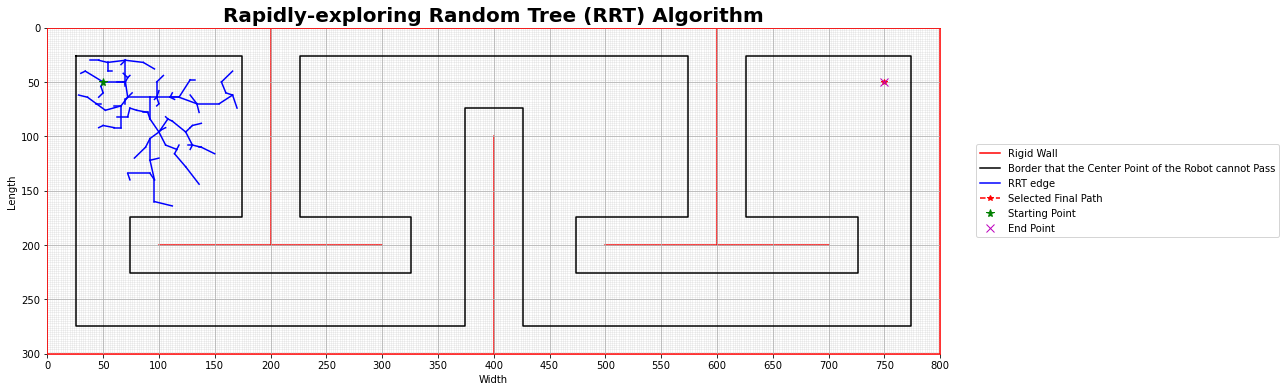

In [48]:
### A.) Plot the Configuration Space
## 1.) Try plotting workspace first
# a.) Define figure and axis, and set figure size
fig, ax = plt.subplots(figsize = (16, 6))

# b.) Label axis
plt.xlabel('Width')
plt.ylabel('Length')

# c.) Set axis limit
plt.xlim(map_size_Width)
plt.ylim(map_size_Length)
plt.gca().invert_yaxis()

# d.) Plot major grid
ax.set_xticks(major_grid_Width)
ax.set_yticks(major_grid_Length)
plt.grid(visible = True, which = 'major', linestyle='-') # Major grid parameters

# e.) Plot minor grid
ax.set_xticks(minor_grid_Width, minor = True)  # Set the grid resolution to 2 x 2
ax.set_yticks(minor_grid_Length, minor = True) # Set the grid resolution to 2 x 2
plt.grid(visible = True, which = 'minor', linestyle='-', alpha=0.2) # Minor grid parameters
ax.tick_params(which='minor', bottom=False, left=False) # Hide grid

# f.) Plot walls in red
# Outer walls
for spine in ax.spines.values():
    
    spine.set_edgecolor('red')
    
# Inner walls
for idx in range(0, thin_walls.shape[0]):
    
    if idx == 1:
        
        plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', label = "Rigid Wall", zorder = 1)
        continue
        
    plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', zorder = 1)
    
#plt.scatter(obs_array_RRT[:,0], obs_array_RRT[:,1], color = 'black', label = "Walls")
plt.plot(obs_corns[:,0], obs_corns[:,1], '-k', label = "Border that the Center Point of the Robot cannot Pass")

# h.) Run RRT algorithm
rrt_alg = RRT_Algorithm(obs_array_RRT, grid_res, angle_res, robot_Size, step_Size = 20, max_iter = 100)
best_path = rrt_alg(strt_pt, end_pt)
plt.plot(best_path[:, 0], best_path[:, 1], "--r*", label = 'Selected Final Path') # Plot the final path

# i.) Plot the starting location and the ending location
plt.plot(strt_pt[0], strt_pt[1], 'g*', label ="Starting Point", markersize = 8)
plt.plot(end_pt[0], end_pt[1], 'mx', label ="End Point", markersize = 8)

# j.) Plot title
plt.title("Rapidly-exploring Random Tree (RRT) Algorithm", fontsize = 20, fontweight = "bold")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

# Show the final plot
plt.show()

#### c.) 150 samples

Number of iteration:  150


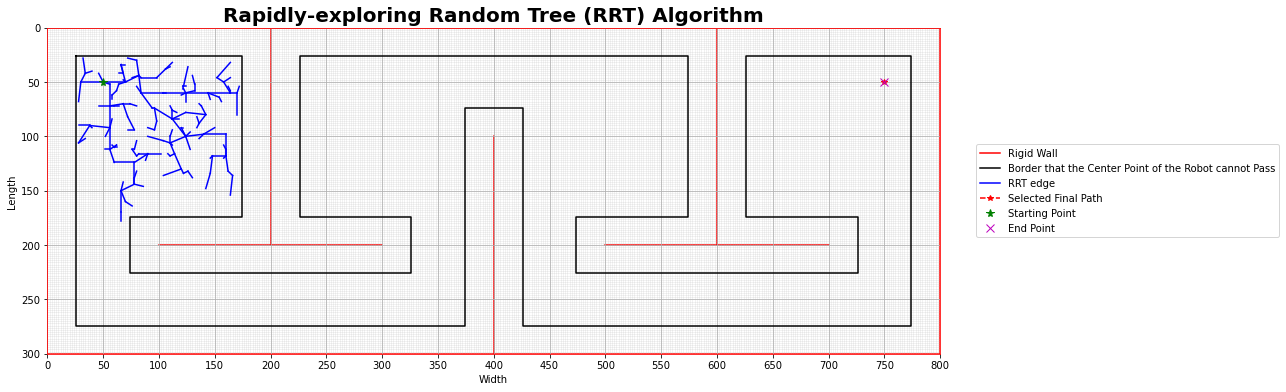

In [49]:
### A.) Plot the Configuration Space
## 1.) Try plotting workspace first
# a.) Define figure and axis, and set figure size
fig, ax = plt.subplots(figsize = (16, 6))

# b.) Label axis
plt.xlabel('Width')
plt.ylabel('Length')

# c.) Set axis limit
plt.xlim(map_size_Width)
plt.ylim(map_size_Length)
plt.gca().invert_yaxis()

# d.) Plot major grid
ax.set_xticks(major_grid_Width)
ax.set_yticks(major_grid_Length)
plt.grid(visible = True, which = 'major', linestyle='-') # Major grid parameters

# e.) Plot minor grid
ax.set_xticks(minor_grid_Width, minor = True)  # Set the grid resolution to 2 x 2
ax.set_yticks(minor_grid_Length, minor = True) # Set the grid resolution to 2 x 2
plt.grid(visible = True, which = 'minor', linestyle='-', alpha=0.2) # Minor grid parameters
ax.tick_params(which='minor', bottom=False, left=False) # Hide grid

# f.) Plot walls in red
# Outer walls
for spine in ax.spines.values():
    
    spine.set_edgecolor('red')
    
# Inner walls
for idx in range(0, thin_walls.shape[0]):
    
    if idx == 1:
        
        plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', label = "Rigid Wall", zorder = 1)
        continue
        
    plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', zorder = 1)
    
#plt.scatter(obs_array_RRT[:,0], obs_array_RRT[:,1], color = 'black', label = "Walls")
plt.plot(obs_corns[:,0], obs_corns[:,1], '-k', label = "Border that the Center Point of the Robot cannot Pass")

# h.) Run RRT algorithm
rrt_alg = RRT_Algorithm(obs_array_RRT, grid_res, angle_res, robot_Size, step_Size = 20, max_iter = 150)
best_path = rrt_alg(strt_pt, end_pt)
plt.plot(best_path[:, 0], best_path[:, 1], "--r*", label = 'Selected Final Path') # Plot the final path

# i.) Plot the starting location and the ending location
plt.plot(strt_pt[0], strt_pt[1], 'g*', label ="Starting Point", markersize = 8)
plt.plot(end_pt[0], end_pt[1], 'mx', label ="End Point", markersize = 8)

# j.) Plot title
plt.title("Rapidly-exploring Random Tree (RRT) Algorithm", fontsize = 20, fontweight = "bold")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

# Show the final plot
plt.show()

#### d.) 10000 samples

Goal Reached
Number of iteration:  7610


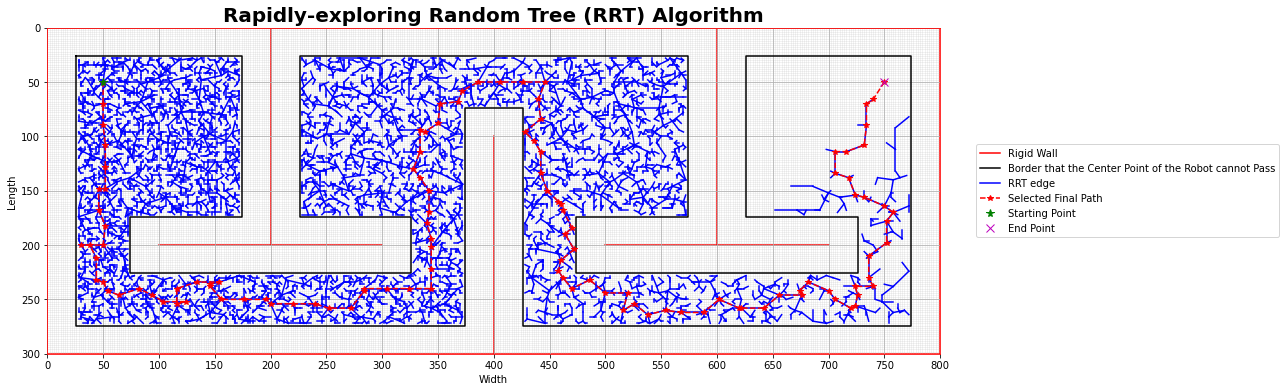

In [50]:
### A.) Plot the Configuration Space
## 1.) Try plotting workspace first
# a.) Define figure and axis, and set figure size
fig, ax = plt.subplots(figsize = (16, 6))

# b.) Label axis
plt.xlabel('Width')
plt.ylabel('Length')

# c.) Set axis limit
plt.xlim(map_size_Width)
plt.ylim(map_size_Length)
plt.gca().invert_yaxis()

# d.) Plot major grid
ax.set_xticks(major_grid_Width)
ax.set_yticks(major_grid_Length)
plt.grid(visible = True, which = 'major', linestyle='-') # Major grid parameters

# e.) Plot minor grid
ax.set_xticks(minor_grid_Width, minor = True)  # Set the grid resolution to 2 x 2
ax.set_yticks(minor_grid_Length, minor = True) # Set the grid resolution to 2 x 2
plt.grid(visible = True, which = 'minor', linestyle='-', alpha=0.2) # Minor grid parameters
ax.tick_params(which='minor', bottom=False, left=False) # Hide grid

# f.) Plot walls in red
# Outer walls
for spine in ax.spines.values():
    
    spine.set_edgecolor('red')
    
# Inner walls
for idx in range(0, thin_walls.shape[0]):
    
    if idx == 1:
        
        plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', label = "Rigid Wall", zorder = 1)
        continue
        
    plt.plot(thin_walls[idx][0], thin_walls[idx][1], '-r', zorder = 1)
    
#plt.scatter(obs_array_RRT[:,0], obs_array_RRT[:,1], color = 'black', label = "Walls")
plt.plot(obs_corns[:,0], obs_corns[:,1], '-k', label = "Border that the Center Point of the Robot cannot Pass")

# h.) Run RRT algorithm
rrt_alg = RRT_Algorithm(obs_array_RRT, grid_res, angle_res, robot_Size, step_Size = 20, max_iter = 10000)
best_path = rrt_alg(strt_pt, end_pt)
plt.plot(best_path[:, 0], best_path[:, 1], "--r*", label = 'Selected Final Path') # Plot the final path

# i.) Plot the starting location and the ending location
plt.plot(strt_pt[0], strt_pt[1], 'g*', label ="Starting Point", markersize = 8)
plt.plot(end_pt[0], end_pt[1], 'mx', label ="End Point", markersize = 8)

# j.) Plot title
plt.title("Rapidly-exploring Random Tree (RRT) Algorithm", fontsize = 20, fontweight = "bold")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

# Show the final plot
plt.show()

In [51]:
# Calculate the total length of the RRT path
RRT_path_length = 0

for idx in range(0, best_path.shape[0] - 1):
    
    # Euclidean Distance
    x_delta = best_path[idx, 0] - best_path[idx + 1, 0]
    x_delta_sq = x_delta*x_delta
    y_delta = best_path[idx, 1] - best_path[idx + 1, 1]
    y_delta_sq = y_delta*y_delta
    edge_length = math.sqrt(x_delta_sq + y_delta_sq)
    
    # Cumulated distance
    RRT_path_length = RRT_path_length + edge_length
    
print("RRT Algorithm Path Length: ", RRT_path_length, " units")

RRT Algorithm Path Length:  1721.7174909623232  units


**Comments on the main differences in performance between PRM and RRT:**<br>
RRT requires a lot more number of samples than the PRM to generate a path from the intial point to the final point because RRT builds a new graph from the initial point in every iteration and aims to land a point that is randomly generated within the final point area. On the other hand, PRM just requires a sufficient amount of randomly generated nodes to build a roadmap that will cover most of the free space; then, the final path will be determined by the greedy algorithm. Hence, PRM requires lesser computational cost than RRT. Besides that, based on my generated final paths from RRT plot with 10000 samples and PRM plot with 150 samples, PRM final path length is 246 units shorter than the RRT final path length. Hence, PRM has a more efficient path than the RRT. 